**Análisis de la correlación entre la presencia de cultivos de coca y las necesidades básicas insatisfechas en Nariño, período 2000-2022**

**Campista**: Liliana Delgado

---
Este proyecto hace parte de las actividades de cierre del bootcamp de Análisis de Datos, en el nivel Innovador, que se llevó a cabo en el marco del proyecto Talento Tech, iniciativa impulsada por el Ministerio de Tecnologías de la Información y las Comunicaciones (MinTIC) de Colombia, durante el primer semestre del año 2024. En este sentido, el presente ejercicio de análisis tiene como propósito la aplicación de los contenidos abordados en el bootcamp, donde diferentes conceptos, códigos y materiales hacen parte integral de sus componentes y unidades.

Para acceder a información adicional sobre el proyecto Talento Tech, se invita a consultar el siguiente [enlace](https://www.talentotech.gov.co/portal/#inicio). Asimismo, los contenidos y actividades desarrolladas en el marco del bootcamp están disponibles en el [repositorio](https://www.github.com/lidelbe/TalentoTech/). De la misma forma, los resultados del presente análisis de caso se encuentran igualmente disponibles en el [repositorio](https://github.com/lidelbe/TalentoTech/tree/main/AD_Innovador/Caso_estudio) mencionado y en el [video](https://youtu.be/CwWg1ORe3FM) de presentación que sintetiza dichos resultados.

---


**Objetivo General**:

Analizar la evolución de la presencia de los cultivos de coca en el departamento de Nariño desde el año 2000 hasta el 2022 y su relación con la población con necesidades básicas insatisfechas (NBI).

**Objetivos Específicos**:
1. Describir la evolución de la presencia de cultivos de coca en Nariño entre 2000 y 2022.
2. Mapear la distribución geográfica de los cultivos de coca dentro del departamento de Nariño.
3. Analizar, a través de herramientas estadísticas, la posible correlación entre la presencia de cultivos de coca y las NBI en la población.

**Hipótesis:**

***Hipótesis de Investigación (H1)***: Existe una relación positiva entre el nivel de necesidades básicas insatisfechas (NBI) de la población y la presencia de cultivos de coca en el departamento de Nariño.

**Hipótesis Nula (H0):** La probabilidad de presencia de cultivos de coca no está relacionada con el nivel de necesidades básicas insatisfechas (NBI) de la población en las zonas del departamento de Nariño.

**Datos Utilizados:**

Para la realización de este ejercicio se trabajará con información del Sistema de Información de Drogas de Colombia (SIDCO) del Observatorio de Drogas del Ministerio de Justicia de Colombia, sobre la presencia de cultivos de coca en el departamento de Nariño durante los años 2000 a 2022. Estos datos están disponibles en la página web del Observatorio: https://www.minjusticia.gov.co/programas-co/ODC/Paginas/SIDCO.aspx

Además, se utilizarán los datos sobre las necesidades básicas insatisfechas en Colombia, calculados por el DANE en el Censo Nacional de Población y Vivienda (CNPV), los cuales están disponibles en: https://dane.maps.arcgis.com/apps/MapSeries/index.html?appid=dc3699bda82348859801cf3414516fec

**Herramientas Utilizadas:**

Para alcanzar los objetivos propuestos, se aplicarán diferentes herramientas de análisis a los conjuntos de datos, a través del entorno interactivo Google Colab, utilizando Jupyter Notebook, junto con librerías de Python como SQL y pandas. Las herramientas específicas utilizadas incluyen:

*Análisis estadístico*: Para recopilar, organizar, analizar e interpretar los datos, identificando patrones y tendencias.

*Estadística inferencial*: Para hacer inferencias sobre las posibles relaciones entre las variables y confirmar o refutar las hipótesis de investigación formuladas.

*Georreferenciación y análisis geoespacial*: Para identificar visualmente la distribución de las dos variables de análisis en el territorio y detectar posibles patrones espaciales de correlación.

*Pruebas de Chi Cuadrado*: Para evaluar la independencia entre las variables de presencia de cultivos de coca y NBI.

*Visualización de datos*: Para representar gráficamente los resultados y cumplir con los objetivos propuestos.

1.  **Instalación de las librerías y paquetes necesarios**

In [ ]:
!pip install mysql-connector-python
!pip install pandas numpy matplotlib seaborn
!pip install pandasql
!pip install libpysal
!pip install esda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql as psql
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import libpysal.weights as lp
import esda


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 39.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=4094122c6bce1a5a8f008d197b0569bca2bfee336c31bbbc6d0d7a5fda7f5d83
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 3.8 MB/s eta 0:00:00


2. **Extracción de datos**

Cargamos el primer archivo excel con la base de datos sobre la presencia de cultivos de uso ilícito (coca) en el departamento de Nariño, durante el periodo 2000 - 2020.

In [ ]:
# Cargar el archivo con la base de datos
df_cultivos = pd.read_excel('/content/cultivos.xlsx')

# Mostrar las filas para ver su contenido
df_cultivos.head()

,CODDEPTO,DEPTO,CODMPIO,MUNICIPIO,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,52.0,NARIÑO,52036.0,ANCUYA,0.00,0.0,0,0.0,0.0,43,...,0,3,21.00,24.25,45.6,24.63,16.31,14.89,56.07,57.73
1,52.0,NARIÑO,52079.0,BARBACOAS,1769.58,713.7,2187,2767.0,1469.0,1920,...,1511,1330,2453.49,3359.37,4590.5,3516.29,3138.09,2569.39,3463.17,3773.06
2,52.0,NARIÑO,52110.0,BUESACO,0.00,0.0,0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
3,52.0,NARIÑO,52207.0,CONSACÁ,0.00,0.0,0,0.0,0.0,5,...,0,0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
4,52.0,NARIÑO,52210.0,CONTADERO,0.00,2.0,0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Revisar columnas del dataset
print(f"El dataset contiene {df_cultivos.shape[0]} filas y {df_cultivos.shape[1]} columnas")
print(f" Las columnas son: {list(df_cultivos.keys())}")

El dataset contiene 35 filas y 27 columnas
 Las columnas son: ['CODDEPTO', 'DEPTO', 'CODMPIO', 'MUNICIPIO', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


El primer dataset tiene la información organizada en 35 filas y 27 columnas, que registran las hectáreas de coca en cada municipio del departamento en cada año.

Ahora, para procesar y analizar la información, los datos se exploran para realizar las transformaciones y la limpieza necesarias.

In [ ]:
# Revisar el tipo de datos de las columnas
tipos = pd.DataFrame(df_cultivos.dtypes)
print(tipos)

                 0
CODDEPTO   float64
DEPTO       object
CODMPIO    float64
MUNICIPIO   object
2000       float64
2001       float64
2002         int64
2003       float64
2004       float64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
2014         int64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64


Se observa que, conforme a lo esperado, la mayoría de los datos del conjunto de datos son numéricos, correspondientes a las hectáreas de coca presentes en cada uno de los municipios para cada uno de los años abarcados.


El conjunto de datos se depura eliminando los datos que no serán utilizados.

In [ ]:
# Eliminar las columnas que no vamos a usar
df1 = df_cultivos.drop(['CODDEPTO', 'DEPTO'], axis=1)

In [ ]:
# Verficar cambio
df1.head(4)

,CODMPIO,MUNICIPIO,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,52036.0,ANCUYA,0.00,0.0,0,0.0,0.0,43,0,17,...,0,3,21.00,24.25,45.6,24.63,16.31,14.89,56.07,57.73
1,52079.0,BARBACOAS,1769.58,713.7,2187,2767.0,1469.0,1920,1460,1586,...,1511,1330,2453.49,3359.37,4590.5,3516.29,3138.09,2569.39,3463.17,3773.06
2,52110.0,BUESACO,0.00,0.0,0,0.0,0.0,0,0,0,...,0,0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
3,52207.0,CONSACÁ,0.00,0.0,0,0.0,0.0,5,0,0,...,0,0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Dar formato a columnas tipo numérico
df1.iloc[:, 3:25] = df1.iloc[:, 3:25].astype('float64')

In [ ]:
# Descripción de las variables numéricas en el set de datos
df_cultivos.describe(include=["number"])

,CODDEPTO,CODMPIO,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,34.0,34.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,52.0,52413.470588,533.906286,422.465143,864.685714,1007.292000,808.868571,792.857143,891.828571,1157.657143,...,752.971429,987.714286,1700.313714,2435.850286,2613.406857,2394.474857,2112.243429,1757.221714,3229.482286,3414.085143
std,0.0,202.159888,1651.214489,1297.214044,2719.531932,3144.178631,2512.532236,2435.276432,2835.588988,3521.876321,...,2442.254196,3221.882137,5664.425849,8014.492405,8232.612929,7440.335665,6462.107298,5339.061868,9883.002354,10512.857469
min,52.0,52036.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.0,52251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,12.820000,16.265000,30.865000,21.375000,16.315000,13.755000,31.730000,44.835000
50%,52.0,52408.000000,0.000000,2.000000,5.000000,5.880000,0.000000,27.000000,11.000000,81.000000,...,52.000000,78.000000,120.360000,177.570000,292.300000,294.950000,279.540000,273.540000,568.550000,537.650000
75%,52.0,52564.750000,55.715000,35.695000,199.000000,252.000000,317.000000,418.500000,514.000000,600.500000,...,318.500000,385.000000,534.400000,958.670000,914.870000,892.670000,788.255000,652.630000,1524.340000,1517.370000
max,52.0,52835.000000,9343.360000,7393.140000,15132.000000,17627.610000,14155.200000,13875.000000,15607.000000,20259.000000,...,13177.000000,17285.000000,29755.490000,42627.380000,45734.620000,41903.310000,36964.260000,30751.380000,56515.940000,59746.490000


In [ ]:
# Filtar descripción por años: años 2000, 2005, 2014, 2015, 2017, 2018, 2019, 2020, 2021
df_cultivos.describe(include=["number"])[[2000, 2005, 2014, 2015, 2017, 2018, 2019, 2020, 2021]]

,2000,2005,2014,2015,2017,2018,2019,2020,2021
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,533.906286,792.857143,987.714286,1700.313714,2613.406857,2394.474857,2112.243429,1757.221714,3229.482286
std,1651.214489,2435.276432,3221.882137,5664.425849,8232.612929,7440.335665,6462.107298,5339.061868,9883.002354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,12.820000,30.865000,21.375000,16.315000,13.755000,31.730000
50%,0.000000,27.000000,78.000000,120.360000,292.300000,294.950000,279.540000,273.540000,568.550000
75%,55.715000,418.500000,385.000000,534.400000,914.870000,892.670000,788.255000,652.630000,1524.340000
max,9343.360000,13875.000000,17285.000000,29755.490000,45734.620000,41903.310000,36964.260000,30751.380000,56515.940000


La descripción estadística de los datos muestra una tendencia creciente en la presencia de hectáreas de cultivos de coca en el departamento de Nariño. El cuadro indica que, entre 2002 y 2020, se reportó la presencia de estos cultivos en 34 de los 64 municipios del departamento.

El incremento progresivo de la desviación estándar a lo largo del tiempo de observación refleja un aumento en la dispersión de los datos, es decir, una variación significativa entre la cantidad de hectáreas reportadas en los municipios en un año y a lo largo de los años. Esto sugiere que, mientras algunos municipios tienen valores muy bajos (incluso 0 hectáreas), otros presentan valores considerablemente altos.

A partir de la descripción estadística de los datos se pueden observar varios fenómenos:

A partir del año 2014 se observa que el percentil 25 deja de ser 0. Esto indica que, al menos el 25% de los municipios abarcados con presencia, tienen más de 2 hectáreas de coca. Este cambio sugiere un aumento en los valores más bajos, reflejando que los municipios con menores hectáreas de coca registraron una mayor cantidad. Esta tendencia se mantiene en los años siguientes, con aumentos en el percentil 25 y en la media, lo que denota un crecimiento sostenido en la presencia de cultivos de coca.

Se observa una ligera disminución en 2018 y 2020, representada por una reducción en la media y en los percentiles, así como una disminución considerable en la desviación estándar (lo cual indica una reducción en la variabilidad de los datos). Estos valores pueden estar relacionados con las expectativas generadas por la implementación del punto 4 de los acuerdos de paz, referentes al fenómeno de las drogas, así como con la puesta en marcha de programas de sustitución voluntaria de cultivos y los efectos de la pandemia.

A partir de 2021, se registra un aumento significativo en todos los valores estadísticos, incluyendo la media y los percentiles, lo cual sugiere una intensificación en la presencia de cultivos de coca en el departamento. Esta tendencia ascendente continúa en el año 2022.



In [ ]:
# Descripción de las variables objeto en el set de datos
df_cultivos.describe(include=['object'])

,DEPTO,MUNICIPIO
count,34,35
unique,1,35
top,NARIÑO,ANCUYA
freq,34,1


En cuanto a la descripción de los datos no numéricos, se muestra el número de observaciones en la tabla (35), pertenecientes a los 34 municipios con cultivos de coca en el periodo analizado, más una fila correspondiente al total departamental.

In [ ]:
# Verificar datos nulos
df1.isnull().sum()

CODMPIO      1
MUNICIPIO    0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
2021         0
2022         0
dtype: int64

Se observa que sólo hay datos nulos en la primera columna del conjunto de datos. Al comprobar, este dato se refiere a la fila del total departamental que no tiene código. Por lo tanto, se procede a sustituir el valor nulo.

In [ ]:
# Remplazar valores nulos
df1['CODMPIO'] = df1['CODMPIO'].fillna(0).astype(int)

In [ ]:
# Dar formato a los valores de la columna CODMPIO
df1['CODMPIO'] = df1['CODMPIO'].astype(int)

Realizamos un gráfico de líneas para observar la tendencia de la presencia de coca en el departamento a lo largo del tiempo. Para ello, seleccionamos únicamente la fila correspondiente al total departamental.

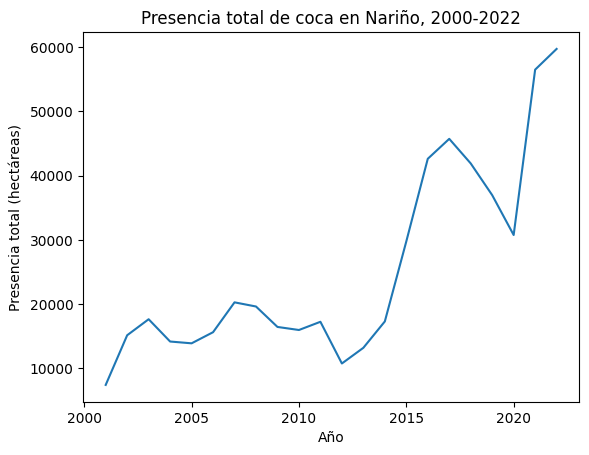

In [ ]:
# Seleccinar los datos de la fila 34 (total depto) desde la columna 3 en adelante (años 2000-2022)
data_total_dpto = df1.iloc[34, 3:]

# Crear un gráfico de líneas
plt.plot(data_total_dpto)
plt.xlabel("Año")
plt.ylabel("Presencia total (hectáreas)")
plt.title("Presencia total de coca en Nariño, 2000-2022")

plt.show()


El gráfico confirma lo observado en la descripción estadística. Existe una tendencia creciente en los datos de presencia de cultivos de coca en el departamento. Se observa que, entre los años 2007 y 2013, la presencia se mantiene relativamente estable, presentando algunas fluctuaciones menores. A partir del año 2014, se produce un aumento significativo en las hectáreas, que alcanza su pico alrededor de los años 2016 y 2017. Después de este período, se registra una disminución considerable hasta el año 2020, cuando comienza otro aumento pronunciado en las hectáreas con presencia de cultivos de coca. El punto más alto en el gráfico se encuentra hacia el final del período, aproximadamente entre 2021 y 2022.

Para conocer los municipios con mayor presencia de cultivos ilícitos, se procede a calcular el valor total de hectáreas de coca presentes en cada municipio durante el periodo analizado.

In [ ]:
# Eliminar la última fila del total departamental
df2 = df1.iloc[:-1]

# Crear una nueva columna 'total_municip' sumando los valores de cada año
df2['total_municip'] = df2.iloc[:, 3:].sum(axis=1)

# Ordenar 'total_municip' en orden descendente y seleccionar los 5 con mayor presencia de cultivos
mayor_presencia = df2.nlargest(5, 'total_municip')

print(mayor_presencia[['MUNICIPIO', 'total_municip']])

                           MUNICIPIO  total_municip
33                            TUMACO      211145.52
1                          BARBACOAS       56256.06
8                          EL CHARCO       56140.95
27          ROBERTO PAYÁN (San José)       49271.04
23  OLAYA HERRERA (Bocas de Satinga)       41574.54


<ipython-input-15-d3ca5502a29b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_municip'] = df2.iloc[:, 3:].sum(axis=1)


Los datos muestran que los municipios con mayor cantidad de hectáreas de coca durante el periodo de observación son: Tumaco, que lidera el grupo por amplio margen (211.145 ha), cantidad más de tres veces superior al segundo lugar, ocupado por Barbacoas (56.256 ha). El tercer lugar lo ocupa el municipio de El Charco (56.140 ha), seguido por Roberto Payán (49.271 ha), y en quinto lugar está el municipio de Olaya Herrera (41.574 ha).

Llama la atención que los cinco municipios con mayor número de hectáreas de coca estén ubicados en la zona Pacífica del departamento. Para visualizar este hecho, procedemos a graficar y georeferenciar los datos.

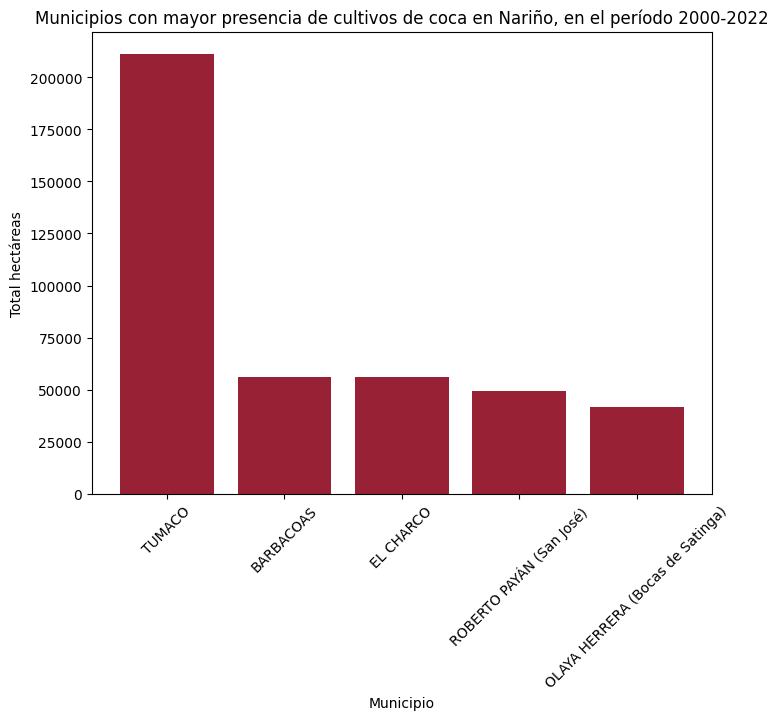

In [ ]:
# Gráfico de los 5 municipios con mayor presencia
plt.figure(figsize=(8, 6))
plt.bar(mayor_presencia['MUNICIPIO'], mayor_presencia['total_municip'], color='#992135')

plt.xlabel("Municipio")
plt.ylabel("Total hectáreas")
plt.title("Municipios con mayor presencia de cultivos de coca en Nariño, en el período 2000-2022")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.show()

El gráfico ilustra los cinco municipios con mayor presencia de cultivos de coca en el departamento durante el periodo analizado. Se destaca la amplia diferencia en el número de hectáreas de coca entre el municipio que ocupa el primer lugar (Tumaco) y el municipio que ocupa el segundo lugar (Barbacoas).

3. **Georreferenciación**

Para georeferenciar las hectáreas de coca presentes en los municipios, se carga un mapa del departamento. El mapa utilizado para esta visualización de datos georreferenciados fue utilizado en ejercicios anteriores del bootcamp.

In [ ]:
# Cargar el mapa
depto = gpd.read_file("/content/Nariño.geojson")

<Axes: >

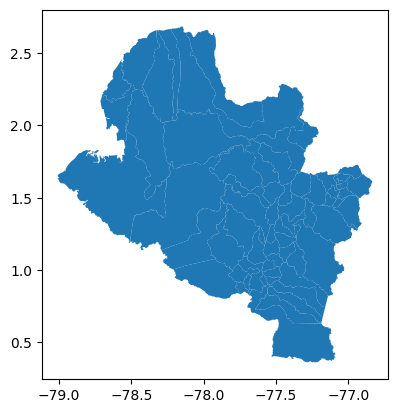

In [ ]:
# Visualizar el mapa
depto.plot()

Para el análisis georreferenciado, se creará una nueva base de datos filtrando la información disponible. Esta nueva base de datos incluirá los datos totales de hectáreas de coca presentes en cada municipio, así como los datos específicos del año 2021, el cual, según lo observado en la gráfica de tendencia, muestra un pico en la presencia de hectáreas de coca en el departamento.

In [ ]:
# Cree un nuevo dataframe con información sobre la presencia total de hectáreas de coca y del año 2021.

df3 = df2[['CODMPIO', 'MUNICIPIO', 'total_municip', 2021]]
print(df3)

    CODMPIO                         MUNICIPIO  total_municip      2021
0     52036                            ANCUYA         328.48     56.07
1     52079                         BARBACOAS       56256.06   3463.17
2     52110                           BUESACO           4.00      0.00
3     52207                           CONSACÁ           5.00      0.00
4     52210                         CONTADERO           2.00      0.00
5     52215                           CÓRDOBA           1.00      0.00
6     52227                            CUMBAL           2.00      0.00
7     52233                         CUMBITARA        9239.88   1387.76
8     52250                         EL CHARCO       56140.95   8952.35
9     52254                          EL PEÑOL         698.16     79.38
10    52256                        EL ROSARIO       10251.03   1576.82
11    52260                          EL TAMBO         920.87    115.58
12    52520     FRANCISCO PIZARRO (Salahonda)        4744.51    501.53
13    

In [ ]:
# Renombrar columna
df3 = df3.rename(columns={2021: 'A2021'})
df3.head(5)

,CODMPIO,MUNICIPIO,total_municip,A2021
0,52036,ANCUYA,328.48,56.07
1,52079,BARBACOAS,56256.06,3463.17
2,52110,BUESACO,4.00,0.00
3,52207,CONSACÁ,5.00,0.00
4,52210,CONTADERO,2.00,0.00


In [ ]:
# Descripción de las variables numéricas en el set de datos
df3.describe(include=["number"])

,CODMPIO,total_municip,A2021
count,34.000000,34.000000,34.000000
mean,52413.470588,16425.406471,1662.233529
std,202.159888,38321.702199,3472.608390
min,52036.000000,1.000000,0.000000
25%,52251.000000,183.932500,27.160000
50%,52408.000000,3868.130000,535.040000
75%,52564.750000,10735.792500,1450.835000
max,52835.000000,211145.520000,18109.110000


La descripción estadística de los datos sobre el total de hectáreas presentes en los municipios demuestra lo que se había señalado anteriormente: una gran variabilidad en la cantidad de hectáreas entre los municipios (representada por la alta desviación estándar) y una concentración en la presencia de cultivos de coca (representada por la significativa diferencia entre el valor máximo de hectáreas y el resto de los datos de los percentiles).

En cuanto a los datos del año 2021, la alta desviación estándar en comparación con la media indica una variabilidad considerable en la cantidad de hectáreas de coca por municipio, así como una distribución asimétrica y concentrada de las hectáreas. Dado el percentil 25, la mediana y la media, se sugiere que la mayoría de los municipios tienen una cantidad relativamente baja de hectáreas de coca, mientras que unos pocos municipios tienen cantidades significativamente mayores.

Para la georreferenciación se procede a crear dos columnas categóricas para indicar la presencia de cultivos de coca en el año 2021 y en la integralidad del tiempo observado.

In [ ]:
# Crear columnas para verificar si hubo presencia de cultivos en 2021 y en la totalidad del periodo de observación
df3['presencia_2021'] = df3['A2021'].apply(lambda x: 1 if x > 0 else 0)
df3['presencia_t'] = df3['total_municip'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Verficar
df3.head(4)

,CODMPIO,MUNICIPIO,total_municip,A2021,presencia_2021,presencia_t
0,52036,ANCUYA,328.48,56.07,1,1
1,52079,BARBACOAS,56256.06,3463.17,1,1
2,52110,BUESACO,4.00,0.00,0,1
3,52207,CONSACÁ,5.00,0.00,0,1


Se examina la información contenida en el dataset geojson para transformar y limpiar los datos que no son necesarios en este análisis.

In [ ]:
# Ver columnas del dataset de geojson
list(depto.keys())

['OBJECTID_1',
 'DPTO_CCDGO',
 'MPIO_CCDGO',
 'Shape_Leng',
 'OBJECTID',
 'MPIO_CNMBR',
 'DESCRPCION',
 'DEPTO',
 'P_ENERSI',
 'P_ENERNO',
 'P_ALCANSI',
 'P_ALCANNO',
 'P_ACUESI',
 'P_ACUENO',
 'P_GASNSI',
 'P_GASNNO',
 'P_GASNNOIN',
 'P_TELEFSI',
 'P_TELEFNO',
 'P_TELEFNOI',
 'ShapeSTArea',
 'ShapeSTLength',
 'geometry']

Se eliminan las columnas que no se utilizarán en el análisis.

In [ ]:
# Eliminar columnas innecesarias
depto = depto.drop(['P_ENERSI', 'P_ENERNO','P_ALCANSI','P_ALCANNO', 'P_ACUESI', 'P_ACUENO', 'P_GASNSI', 'P_GASNNO','P_GASNNOIN','P_TELEFSI', 'P_TELEFNO', 'P_TELEFNOI'], axis="columns")

In [ ]:
# Verificar cambio
list(depto.keys())
depto.head(5)

,OBJECTID_1,DPTO_CCDGO,MPIO_CCDGO,Shape_Leng,OBJECTID,MPIO_CNMBR,DESCRPCION,DEPTO,ShapeSTArea,ShapeSTLength,geometry
0,113,52,683,0.485121,1066,SANDONA,AREA # 52683,NARIÑO,1.019917e+08,53609.049005,"POLYGON ((-77.47636 1.36684, -77.47668 1.36746..."
1,114,52,685,0.470250,1067,SAN BERNARDO,AREA # 52685,NARIÑO,6.548551e+07,51880.267155,"POLYGON ((-77.00567 1.56509, -77.00771 1.56793..."
2,115,52,687,0.781664,1068,SAN LORENZO,AREA # 52687,NARIÑO,2.502526e+08,85826.510855,"POLYGON ((-77.25601 1.67039, -77.25631 1.67084..."
3,116,52,560,1.281648,1059,POTOSI,AREA # 52560,NARIÑO,3.896548e+08,142165.796708,"POLYGON ((-77.55431 0.83191, -77.55450 0.83295..."
4,117,52,693,0.502292,1069,SAN PABLO,AREA # 52693,NARIÑO,1.124055e+08,55500.703760,"POLYGON ((-76.93441 1.72755, -76.93608 1.72900..."


Se observa que en este conjunto de datos al código del municipio le faltan los dos primeros dígitos correspondientes al código del departamento. A continuación, para concatenar los datos de las dos columnas y crear una clave que nos permita fusionar los dos conjuntos de datos, se comprueban los tipos de datos de las columnas "DPTO_CCDGO" y "MPIO_CCDGO".

In [ ]:
# Comprobar tipos de datos de dataset
tipo = pd.DataFrame(depto.dtypes)
print(tipo)

                      0
OBJECTID_1        int64
DPTO_CCDGO       object
MPIO_CCDGO       object
Shape_Leng      float64
OBJECTID          int64
MPIO_CNMBR       object
DESCRPCION       object
DEPTO            object
ShapeSTArea     float64
ShapeSTLength   float64
geometry       geometry


Una vez verificado que las dos columnas contienen información del mismo tipo, se procede a concatenar la información de las columnas "DPTO_CCDGO" y "MPIO_CCDGO" con el fin de crear un código de municipio que coincida con el existente en el dataset de presencia de hectáreas de coca, y así poder fusionarlo con el dataset geojson.

In [ ]:
# Unir las columnas de código de departamento y municipio para crear el código que sea equivalente

depto["cod"] = depto["DPTO_CCDGO"].astype(str) + depto["MPIO_CCDGO"].astype(str)
print(depto[['DPTO_CCDGO', 'MPIO_CCDGO', 'cod']])

   DPTO_CCDGO MPIO_CCDGO    cod
0          52        683  52683
1          52        685  52685
2          52        687  52687
3          52        560  52560
4          52        693  52693
..        ...        ...    ...
59         52        490  52490
60         52        520  52520
61         52        621  52621
62         52        696  52696
63         52        835  52835

[64 rows x 3 columns]


Una vez creado el código que servirá de clave para la unión, comprobamos que el tipo de datos de las columnas que queremos unir coincidan.

In [ ]:
# Comprobar tipos de datos de dataset geojson
tipo = pd.DataFrame(depto.dtypes)
print(tipo)

                      0
OBJECTID_1        int64
DPTO_CCDGO       object
MPIO_CCDGO       object
Shape_Leng      float64
OBJECTID          int64
MPIO_CNMBR       object
DESCRPCION       object
DEPTO            object
ShapeSTArea     float64
ShapeSTLength   float64
geometry       geometry
cod              object


In [ ]:
# Comprobar tipos de datos de dataset de presencia
tipo2 = pd.DataFrame(df3.dtypes)
print(tipo2)

                      0
CODMPIO           int64
MUNICIPIO        object
total_municip   float64
A2021           float64
presencia_2021    int64
presencia_t       int64


Como los tipos de datos de las columnas "cod" y "CODMPIO" no coinciden, es necesario modificar antes de realizar la unión.

In [ ]:
# Verificar que el tipo de datos coincida para hacer join
df3['CODMPIO'] = df3['CODMPIO'].astype('int64')
depto['cod'] = depto['cod'].astype('int64')


In [ ]:
# Fusionar los datos con los datos del GeoJSON
nariño1_geojson = depto.merge(df3, left_on='cod', right_on='CODMPIO', how='left')


Después de la fusión, representamos en el mapa los datos de presencia total de cultivos de coca en los municipios durante el periodo analizado y la presencia de cultivos de coca en 2021.

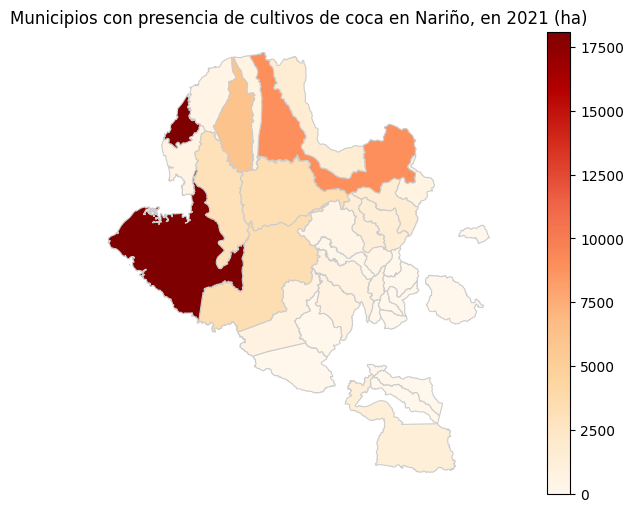

In [ ]:
# Visualizar los datos de presencia en el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
nariño1_geojson.plot(column='A2021', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Municipios con presencia de cultivos de coca en Nariño, en 2021 (ha)')
plt.axis('off')
plt.show()

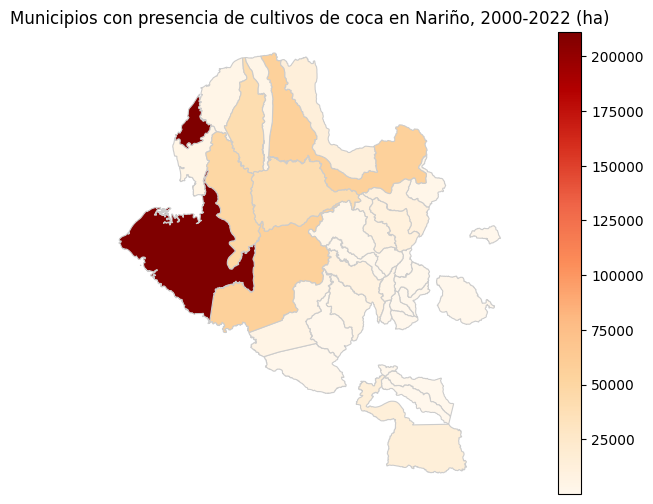

In [ ]:
# Visualizar los datos de presencia en el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
nariño1_geojson.plot(column='total_municip', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Municipios con presencia de cultivos de coca en Nariño, 2000-2022 (ha)')
plt.axis('off')
plt.show()

La representación de los datos en los mapas confirma lo que se había advertido anteriormente: los municipios de las subregiones Pacífico, Sanquianga y Telembí son los que presentan una mayor presencia de hectáreas de coca, tanto en el año 2021 como en la totalidad del periodo analizado (2000-2022), siendo el municipio de Tumaco el que tiene más hectáreas de cultivos.

4. **Análisis de correlación entre variables**

Para abarcar el tercer objetivo específico de este estudio de caso, referente a analizar la posible correlación entre la presencia de cultivos de coca y las necesidades básicas insatisfechas de la población, se procede a cargar la base de datos sobre los porcentajes de población con necesidades básicas insatisfechas en el departamento, publicado por el DANE en el Censo Nacional de Población y Vivienda (CNPV).

In [ ]:
# Cargar el archivo
df_nbi = pd.read_excel('/content/NBI.xlsx')

# Mostrar las filas para ver su contenido
df_nbi.head()

,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Prop de Personas en NBI (%) TOTAL,Prop de Personas en miseria (%) TOTAL,Componente vivienda,Componente Servicios,Componente Hacinamiento,Componente Inasistencia,Componente dependencia económica,Prop de Personas en NBI (%) Cabeceras,Prop de Personas en miseria (%) Cabeceras,Prop de Personas en NBI (%) Centros Poblados y Rural Disperso,Prop de Personas en miseria (%) Centros Poblados y Rural Disperso
0,5,ANTIOQUIA,5001,MEDELLÍN,5.230399,0.417281,0.284643,0.188702,1.555428,1.614882,2.050300,5.173499,0.406939,8.568250,1.023943
1,5,ANTIOQUIA,5002,ABEJORRAL,13.958914,1.365732,0.375576,0.495078,2.663176,1.240539,10.675468,8.757755,0.706969,17.346363,1.794775
2,5,ANTIOQUIA,5004,ABRIAQUÍ,11.630079,1.214386,1.728164,1.588043,2.335357,0.607193,6.959365,4.802260,0.423729,15.003489,1.605024
3,5,ANTIOQUIA,5021,ALEJANDRÍA,12.676424,0.888657,0.705698,0.078411,1.986409,0.888657,9.905907,6.948229,0.045413,20.443350,2.032020
4,5,ANTIOQUIA,5030,AMAGÁ,9.663881,0.936786,0.528347,0.277289,2.368194,1.907296,5.594484,7.829649,0.587417,11.389919,1.265547


La base de datos contiene información sobre mediciones de la población con necesidades básicas insatisfechas y en condiciones de pobreza extrema en todos los municipios del país, tanto en las cabeceras municipales como en las zonas rurales.

Se procede a examinar los datos revisando el tipo de información y la cantidad de datos.

In [ ]:
# Verificar tipo de datos de las columnas
tipos3 = pd.DataFrame(df_nbi.dtypes)
print(tipos3)

                                                          0
Código Departamento                                   int64
Nombre Departamento                                  object
Código Municipio                                      int64
Nombre Municipio                                     object
Prop de Personas en NBI (%) TOTAL                   float64
Prop de Personas en miseria (%) TOTAL               float64
Componente vivienda                                 float64
Componente Servicios                                float64
Componente Hacinamiento                             float64
Componente Inasistencia                             float64
Componente dependencia económica                    float64
Prop de Personas en NBI (%) Cabeceras               float64
Prop de Personas en miseria (%) Cabeceras           float64
Prop de Personas en NBI (%) Centros Poblados y ...  float64
Prop de Personas en miseria (%) Centros Poblado...  float64


In [ ]:
# Revisar columnas del dataset
print(f"El dataset contiene {df_nbi.shape[0]} filas y {df_nbi.shape[1]} columnas")
print(f" Las columnas son: {list(df_nbi.keys())}")

El dataset contiene 1122 filas y 15 columnas
 Las columnas son: ['Código Departamento', 'Nombre Departamento', 'Código Municipio', 'Nombre Municipio', 'Prop de Personas en NBI (%) TOTAL', 'Prop de Personas en miseria (%) TOTAL', 'Componente vivienda', 'Componente Servicios', 'Componente Hacinamiento', 'Componente Inasistencia', 'Componente dependencia económica', 'Prop de Personas en NBI (%) Cabeceras ', 'Prop de Personas en miseria (%) Cabeceras ', 'Prop de Personas en NBI (%) Centros Poblados y Rural Disperso', 'Prop de Personas en miseria (%) Centros Poblados y Rural Disperso']


El dataset tiene 1122 filas de datos, organizadas en 15 columnas. Para realizar el análisis se filtra la información referente únicamente a los municipios del departamento de Nariño y se eliminan las columnas con información que no será utilizada en el análisis.

In [ ]:
# Filtar datos de Nariño
df2_nbi = df_nbi[df_nbi["Código Departamento"] == 52]

In [ ]:
# Eliminar las columnas que no vamos a usar
df3_nbi = df2_nbi.drop(['Componente vivienda', 'Componente Servicios', 'Componente Hacinamiento', 'Componente Inasistencia', 'Componente dependencia económica'], axis=1)

In [ ]:
# Verificar cambio
df3_nbi.head(5)

,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Prop de Personas en NBI (%) TOTAL,Prop de Personas en miseria (%) TOTAL,Prop de Personas en NBI (%) Cabeceras,Prop de Personas en miseria (%) Cabeceras,Prop de Personas en NBI (%) Centros Poblados y Rural Disperso,Prop de Personas en miseria (%) Centros Poblados y Rural Disperso
715,52,NARIÑO,52001,PASTO,8.244979,0.881632,6.257996,0.633026,15.144338,1.744863
716,52,NARIÑO,52019,ALBÁN,15.895495,2.771334,21.856028,3.642671,13.559898,2.429907
717,52,NARIÑO,52022,ALDANA,11.685099,0.407451,10.349374,0.791035,12.063492,0.298786
718,52,NARIÑO,52036,ANCUYÁ,10.800695,0.695094,10.653266,0.653266,10.854125,0.710253
719,52,NARIÑO,52051,ARBOLEDA,25.308156,4.261736,25.304348,5.130435,25.308833,4.107474


Para facilitar su tratamiento en el análisis, se cambia el nombre de las columnas de interés.

In [ ]:
# Renombrar columnas
df3_nbi = df3_nbi.rename(columns={'Código Departamento': 'COD_dpto', 'Nombre Departamento': 'Depto', 'Nombre Municipio': 'Municipio', 'Código Municipio': 'CODMPIO', 'Prop de Personas en NBI (%) TOTAL': 't_nbi', 'Prop de Personas en miseria (%) TOTAL': 't_miseria', 'Prop de Personas en NBI (%) Cabeceras ': 'nbi_cabecera', 'Prop de Personas en miseria (%) Cabeceras ': 'miseria_cabeceras', 'Prop de Personas en NBI (%) Centros Poblados y Rural Disperso': 'nbi_rural', 'Prop de Personas en miseria (%) Centros Poblados y Rural Disperso': 'miseria_rural'})

In [ ]:
# Verificar cambio
df3_nbi.head(5)

,COD_dpto,Depto,CODMPIO,Municipio,t_nbi,t_miseria,nbi_cabecera,miseria_cabeceras,nbi_rural,miseria_rural
715,52,NARIÑO,52001,PASTO,8.244979,0.881632,6.257996,0.633026,15.144338,1.744863
716,52,NARIÑO,52019,ALBÁN,15.895495,2.771334,21.856028,3.642671,13.559898,2.429907
717,52,NARIÑO,52022,ALDANA,11.685099,0.407451,10.349374,0.791035,12.063492,0.298786
718,52,NARIÑO,52036,ANCUYÁ,10.800695,0.695094,10.653266,0.653266,10.854125,0.710253
719,52,NARIÑO,52051,ARBOLEDA,25.308156,4.261736,25.304348,5.130435,25.308833,4.107474


In [ ]:
# Descripción de las variables numéricas en el set de datos
df3_nbi.describe(include=["number"])

,COD_dpto,CODMPIO,t_nbi,t_miseria,nbi_cabecera,miseria_cabeceras,nbi_rural,miseria_rural
count,64.0,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,52.0,52416.687500,26.473923,5.200664,26.951425,4.353749,26.132651,5.566249
std,0.0,230.345281,19.731892,5.950013,24.448285,4.672102,17.303868,6.665467
min,52.0,52001.000000,8.244979,0.407451,5.716724,0.483311,10.030729,0.298786
25%,52.0,52247.500000,14.653833,1.900162,12.356229,1.337684,15.062095,1.999364
50%,52.0,52394.500000,19.041004,2.899501,17.105149,2.551796,18.656034,3.029521
75%,52.0,52591.750000,26.707776,4.782762,33.005236,5.440750,26.902691,5.270571
max,52.0,52885.000000,82.508902,26.501356,99.583478,20.721972,75.938171,29.471112


La descripción estadística de los datos nos muestra que existe una alta variabilidad en los porcentajes de población con necesidades básicas insatisfechas tanto en las zonas urbanas como rurales, con desviaciones estándar elevadas que sugieren grandes diferencias entre municipios. Se observa que el promedio de NBI es similar en las zonas rurales y urbanas, pero los valores extremos (mínimo y máximo), al igual que la desviación estándar, son más pronunciados en las zonas urbanas, lo que indica una mayor dispersión de datos en estas áreas.

Además, la proporción de población en condición de pobreza extrema es, en promedio, mayor en las zonas rurales (5.57%) comparado con las zonas urbanas (4.35%). Es destacable que algunos municipios presentan valores extremos, como un máximo de 99.58% de NBI en zonas urbanas y 75.94% en zonas rurales, lo que indica una alta vulnerabilidad en estas áreas.

Para identificar los municipios con mayor porcentaje de población con necesidades básicas insatisfechas, organizamos el conjunto de datos por esta variable en orden descendente.

In [ ]:
# Organizar en orden descendente
df3_nbi.sort_values(by='t_nbi', ascending=False)

,COD_dpto,Depto,CODMPIO,Municipio,t_nbi,t_miseria,nbi_cabecera,miseria_cabeceras,nbi_rural,miseria_rural
751,52,NARIÑO,52427,MAGÜI,82.508902,24.393317,94.084720,19.727685,75.938171,27.041649
746,52,NARIÑO,52390,LA TOLA,82.298615,19.411664,99.583478,20.721972,65.509103,18.138908
753,52,NARIÑO,52473,MOSQUERA,79.180553,8.527740,98.536103,9.930762,60.170973,7.149796
755,52,NARIÑO,52490,OLAYA HERRERA,77.458326,16.061060,81.931062,14.413430,73.469749,17.530339
771,52,NARIÑO,52696,SANTA BÁRBARA,74.268550,16.520191,91.465736,16.529188,64.982011,16.515333
...,...,...,...,...,...,...,...,...,...,...
743,52,NARIÑO,52378,LA CRUZ,11.601945,1.182402,13.498477,1.801563,10.030729,0.669447
769,52,NARIÑO,52693,SAN PABLO,11.530415,0.945370,5.816494,0.546150,13.794223,1.103538
718,52,NARIÑO,52036,ANCUYÁ,10.800695,0.695094,10.653266,0.653266,10.854125,0.710253
742,52,NARIÑO,52356,IPIALES,10.546056,1.166362,7.552969,0.704829,16.602540,2.100269


In [ ]:
# Mostrar los 10 municipios con mayor población con NBI
query = """
        SELECT Municipio, t_nbi
        FROM df3_nbi
        ORDER BY t_nbi DESC
        LIMIT 10
        """

# Ejecutamos la consulta
result = psql.sqldf(query, locals())
print(result)

           Municipio      t_nbi
0              MAGÜI  82.508902
1            LA TOLA  82.298615
2           MOSQUERA  79.180553
3      OLAYA HERRERA  77.458326
4      SANTA BÁRBARA  74.268550
5          BARBACOAS  72.195598
6           RICAURTE  62.345713
7          EL CHARCO  58.155759
8  FRANCISCO PIZARRO  49.959623
9      ROBERTO PAYÁN  44.418982


Se observa que todos los municipios con mayor proporción de población con necesidades básicas insatisfechas se encuentran en la región del Pacífico. Los cinco primeros se sitúan en la subregión de Sanquianga y Telembi.


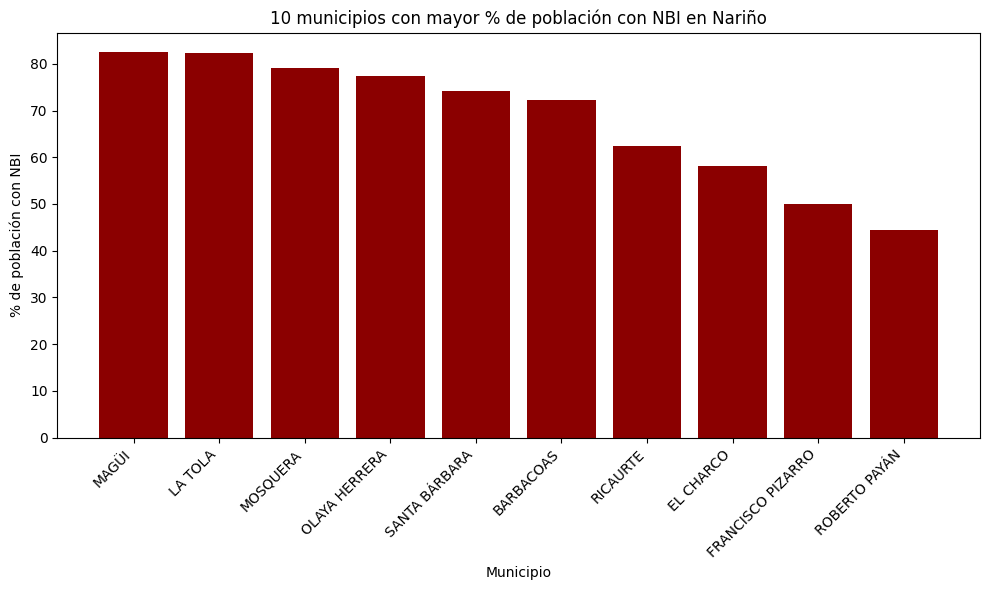

In [ ]:
# Seleccionar los municipios con mayor NBI
top_10_nbi = df3_nbi.sort_values(by='t_nbi', ascending=False).head(10)

# Gráficar
plt.figure(figsize=(10, 6))
plt.bar(top_10_nbi['Municipio'], top_10_nbi['t_nbi'], color='#8B0000')
plt.xlabel('Municipio')
plt.ylabel('% de población con NBI')
plt.title('10 municipios con mayor % de población con NBI en Nariño')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas
plt.tight_layout()
plt.show()

Además, cabe señalar que en 8 de los 10 municipios, el porcentaje de población con NBI supera el 50%, lo que pone de manifiesto la alta vulnerabilidad de la población en estas regiones.

El conjunto de datos sobre necesidades básicas se fusiona con el conjunto de datos geojson para georreferenciar los datos sobre población con necesidades básicas insatisfechas y pobreza extrema.

In [ ]:
# Fusionar los datos con los datos de GeoJSON
nariño2_geojson = depto.merge(df3_nbi, left_on='cod', right_on='CODMPIO', how='left')

In [ ]:
# Verificar la unión
nariño2_geojson.head(5)

,OBJECTID_1,DPTO_CCDGO,MPIO_CCDGO,Shape_Leng,OBJECTID,MPIO_CNMBR,DESCRPCION,DEPTO,ShapeSTArea,ShapeSTLength,...,COD_dpto,Depto,CODMPIO,Municipio,t_nbi,t_miseria,nbi_cabecera,miseria_cabeceras,nbi_rural,miseria_rural
0,113,52,683,0.485121,1066,SANDONA,AREA # 52683,NARIÑO,1.019917e+08,53609.049005,...,52,NARIÑO,52683,SANDONÁ,14.657323,1.863354,13.235931,1.471861,16.025841,2.240283
1,114,52,685,0.470250,1067,SAN BERNARDO,AREA # 52685,NARIÑO,6.548551e+07,51880.267155,...,52,NARIÑO,52685,SAN BERNARDO,21.241830,2.760874,17.541049,2.282739,22.690920,2.948095
2,115,52,687,0.781664,1068,SAN LORENZO,AREA # 52687,NARIÑO,2.502526e+08,85826.510855,...,52,NARIÑO,52687,SAN LORENZO,21.682906,3.199808,46.889226,7.486090,18.281111,2.621339
3,116,52,560,1.281648,1059,POTOSI,AREA # 52560,NARIÑO,3.896548e+08,142165.796708,...,52,NARIÑO,52560,POTOSÍ,12.260536,0.844877,9.666340,0.981354,12.909962,0.810711
4,117,52,693,0.502292,1069,SAN PABLO,AREA # 52693,NARIÑO,1.124055e+08,55500.703760,...,52,NARIÑO,52693,SAN PABLO,11.530415,0.945370,5.816494,0.546150,13.794223,1.103538


In [ ]:
# Revisar columnas del dataset
print(f"El dataset contiene {nariño2_geojson.shape[0]} filas y {nariño2_geojson.shape[1]} columnas")
print(f" Las columnas son: {list(nariño2_geojson.keys())}")

El dataset contiene 64 filas y 22 columnas
 Las columnas son: ['OBJECTID_1', 'DPTO_CCDGO', 'MPIO_CCDGO', 'Shape_Leng', 'OBJECTID', 'MPIO_CNMBR', 'DESCRPCION', 'DEPTO', 'ShapeSTArea', 'ShapeSTLength', 'geometry', 'cod', 'COD_dpto', 'Depto', 'CODMPIO', 'Municipio', 't_nbi', 't_miseria', 'nbi_cabecera', 'miseria_cabeceras', 'nbi_rural', 'miseria_rural']


El conjunto de datos cuenta con información de los 64 municipios del departamento organizada en 22 columnas.

Representamos en el mapa los datos del porcentaje de personas con necesidades básicas insatisfechas y en situación de pobreza extrema.

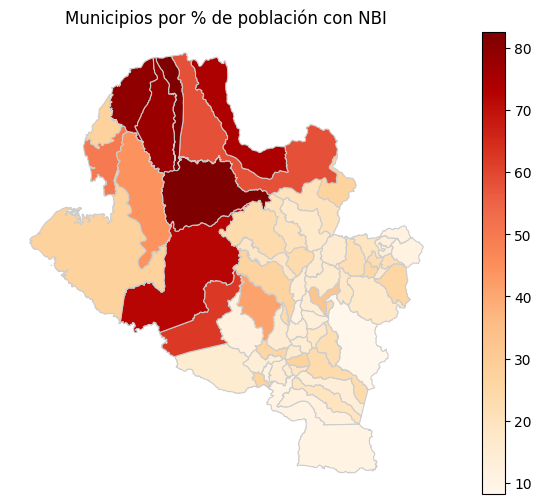

In [ ]:
# Visualizar los datos en el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
nariño2_geojson.plot(column='t_nbi', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Municipios por % de población con NBI')
plt.axis('off')
plt.show()

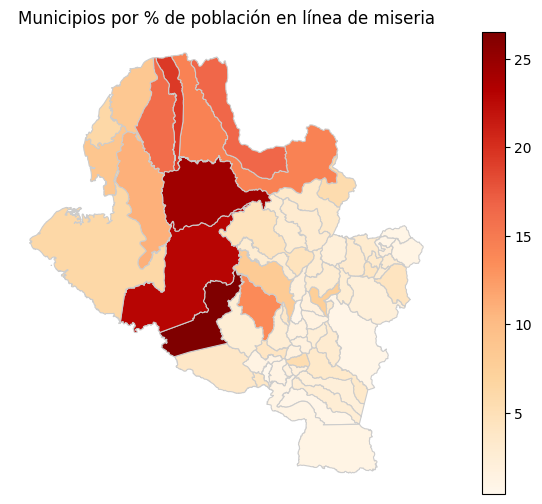

In [ ]:
# Visualizar los datos en el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
nariño2_geojson.plot(column='t_miseria', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Municipios por % de población en línea de miseria')
plt.axis('off')
plt.show()

Como se señaló anteriormente, en los mapas se constata que los municipios con mayor porcentaje de población con NBI se encuentran en las subregiones de Sanquianga y Telembí. Además, se observa que en esta última subregión se encuentran también los porcentajes más altos de población en condición de pobreza extrema.

In [ ]:
# Verificar valores nulos
df3_nbi.isnull().sum()

COD_dpto             0
Depto                0
CODMPIO              0
Municipio            0
t_nbi                0
t_miseria            0
nbi_cabecera         0
miseria_cabeceras    0
nbi_rural            0
miseria_rural        0
dtype: int64

Para continuar en el análisis, se procede a unir todos los conjuntos de datos que se han analizado en el ejercicio, para esto se pasa a un nuevo conjunto de datos con el listado de los municipios del departamento.

In [ ]:
# Cargar el archivo
df5 = pd.read_excel('/content/Mun-nariño.xlsx')

# Mostrar las filas para ver su contenido
df5.head(3)

,COD_MUNICIPIO,MUNICIPIO
0,52001,Pasto
1,52019,Albán
2,52022,Aldana


In [ ]:
# Revisar columnas del dataset
print(f"El dataset contiene {df5.shape[0]} filas y {df5.shape[1]} columnas")
print(f" Las columnas son: {list(df5.keys())}")

El dataset contiene 64 filas y 2 columnas
 Las columnas son: ['COD_MUNICIPIO', 'MUNICIPIO']


El nuevo conjunto de datos sólo contiene información sobre el nombre y el código de los 64 municipios del departamento.

Para realizar la unión, se comprueba que el tipo de datos de la columna de códigos municipales coincide entre todos los conjuntos de datos.

In [ ]:
# Verificar tipo de datos de las columnas
tipos4 = pd.DataFrame(df5.dtypes)
print(tipos4)

                    0
COD_MUNICIPIO   int64
MUNICIPIO      object


In [ ]:
# Verificamos que los tipos de datos de las columanas con los códigos del municipio de los dataset sea "int64"
df3['CODMPIO'] = df3['CODMPIO'].astype('int64')
df3_nbi['CODMPIO'] = df3_nbi['CODMPIO'].astype('int64')

In [ ]:
# Hacer join de los dataset
df5 = pd.merge(df5, df3, left_on='COD_MUNICIPIO', right_on='CODMPIO', how='left')
df5 = pd.merge(df5, df3_nbi, left_on='COD_MUNICIPIO', right_on='CODMPIO', how='left')

In [ ]:
# Verificamos valores nulos
df5.isnull().sum()

COD_MUNICIPIO         0
MUNICIPIO_x           0
CODMPIO_x            30
MUNICIPIO_y          30
total_municip        30
A2021                30
presencia_2021       30
presencia_t          30
COD_dpto              0
Depto                 0
CODMPIO_y             0
Municipio             0
t_nbi                 0
t_miseria             0
nbi_cabecera          0
miseria_cabeceras     0
nbi_rural             0
miseria_rural         0
dtype: int64

Tras realizar la unión, se observa que hay 30 datos nulos en el conjunto de datos.

In [ ]:
# Ver el dataset
df5

,COD_MUNICIPIO,MUNICIPIO_x,CODMPIO_x,MUNICIPIO_y,total_municip,A2021,presencia_2021,presencia_t,COD_dpto,Depto,CODMPIO_y,Municipio,t_nbi,t_miseria,nbi_cabecera,miseria_cabeceras,nbi_rural,miseria_rural
0,52001,Pasto,NaN,NaN,NaN,NaN,NaN,NaN,52,NARIÑO,52001,PASTO,8.244979,0.881632,6.257996,0.633026,15.144338,1.744863
1,52019,Albán,NaN,NaN,NaN,NaN,NaN,NaN,52,NARIÑO,52019,ALBÁN,15.895495,2.771334,21.856028,3.642671,13.559898,2.429907
2,52022,Aldana,NaN,NaN,NaN,NaN,NaN,NaN,52,NARIÑO,52022,ALDANA,11.685099,0.407451,10.349374,0.791035,12.063492,0.298786
3,52036,Ancuya,52036.0,ANCUYA,328.48,56.07,1.0,1.0,52,NARIÑO,52036,ANCUYÁ,10.800695,0.695094,10.653266,0.653266,10.854125,0.710253
4,52051,Arboleda,NaN,NaN,NaN,NaN,NaN,NaN,52,NARIÑO,52051,ARBOLEDA,25.308156,4.261736,25.304348,5.130435,25.308833,4.107474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,52786,Taminango,NaN,NaN,NaN,NaN,NaN,NaN,52,NARIÑO,52786,TAMINANGO,16.240592,2.238515,12.985238,0.902132,17.253701,2.654416
60,52788,Tangua,NaN,NaN,NaN,NaN,NaN,NaN,52,NARIÑO,52788,TANGUA,22.369567,2.971639,20.538966,2.804079,23.032301,3.032301
61,52835,San Andrés De Tumaco,52835.0,TUMACO,211145.52,18109.11,1.0,1.0,52,NARIÑO,52835,SAN ANDRÉS DE TUMACO,27.616378,6.310154,18.236912,2.569864,38.827034,10.780675
62,52838,Túquerres,NaN,NaN,NaN,NaN,NaN,NaN,52,NARIÑO,52838,TÚQUERRES,15.175738,2.629507,7.487265,0.817439,20.362009,3.851840


Al observar el conjunto de datos, se analiza que los valores nulos corresponden a los municipios del departamento donde no hay cultivos de coca, por lo tanto, no había datos en el conjunto de datos de cultivos.

Se procede a limpiar el conjunto de datos.

In [ ]:
# Limpiar el dataset
df5['A2021'] = df5['A2021'].fillna(0)
df5['presencia_2021'] = df5['presencia_2021'].fillna(0)
df5['presencia_t'] = df5['presencia_t'].fillna(0)
df5['total_municip'] = df5['total_municip'].fillna(0)
df5 = df5.drop(['MUNICIPIO_x', 'CODMPIO_x', 'MUNICIPIO_y', 'CODMPIO_y'], axis=1)

In [ ]:
# Verificar
df5

,COD_MUNICIPIO,total_municip,A2021,presencia_2021,presencia_t,COD_dpto,Depto,Municipio,t_nbi,t_miseria,nbi_cabecera,miseria_cabeceras,nbi_rural,miseria_rural
0,52001,0.00,0.00,0.0,0.0,52,NARIÑO,PASTO,8.244979,0.881632,6.257996,0.633026,15.144338,1.744863
1,52019,0.00,0.00,0.0,0.0,52,NARIÑO,ALBÁN,15.895495,2.771334,21.856028,3.642671,13.559898,2.429907
2,52022,0.00,0.00,0.0,0.0,52,NARIÑO,ALDANA,11.685099,0.407451,10.349374,0.791035,12.063492,0.298786
3,52036,328.48,56.07,1.0,1.0,52,NARIÑO,ANCUYÁ,10.800695,0.695094,10.653266,0.653266,10.854125,0.710253
4,52051,0.00,0.00,0.0,0.0,52,NARIÑO,ARBOLEDA,25.308156,4.261736,25.304348,5.130435,25.308833,4.107474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,52786,0.00,0.00,0.0,0.0,52,NARIÑO,TAMINANGO,16.240592,2.238515,12.985238,0.902132,17.253701,2.654416
60,52788,0.00,0.00,0.0,0.0,52,NARIÑO,TANGUA,22.369567,2.971639,20.538966,2.804079,23.032301,3.032301
61,52835,211145.52,18109.11,1.0,1.0,52,NARIÑO,SAN ANDRÉS DE TUMACO,27.616378,6.310154,18.236912,2.569864,38.827034,10.780675
62,52838,0.00,0.00,0.0,0.0,52,NARIÑO,TÚQUERRES,15.175738,2.629507,7.487265,0.817439,20.362009,3.851840


In [ ]:
# Revisar columnas del dataset
print(f"El dataset contiene {df5.shape[0]} filas y {df5.shape[1]} columnas")
print(f" Las columnas son: {list(df5.keys())}")

El dataset contiene 64 filas y 14 columnas
 Las columnas son: ['COD_MUNICIPIO', 'total_municip', 'A2021', 'presencia_2021', 'presencia_t', 'COD_dpto', 'Depto', 'Municipio', 't_nbi', 't_miseria', 'nbi_cabecera', 'miseria_cabeceras', 'nbi_rural', 'miseria_rural']


El conjunto de datos cuenta ahora con información sobre los 64 municipios organizada en 14 columnas.


Se procede a analizar si existe correlación entre las variables analizadas: proporción de población con necesidades básicas insatisfechas y presencia de cultivos de coca (tanto en la totalidad del período abarcado como en el año 2021).

In [ ]:
# Analizamos si existe una correlación entre las variables NBI y hectáreas de cultivo de coca en 2021.

correlacion1 = df5['t_nbi'].corr(df5['A2021'])
print(correlacion1)

0.34662370947920973


In [ ]:
# Analizamos si existe una correlación entre las variables NBI y la presencia de cultivos de coca en la totalidad del periodo

correlacion2 = df5['t_nbi'].corr(df5['presencia_t'])
print(correlacion2)

0.38730234290676646


El coeficiente de correlación obtenido entre la proporción de población con necesidades básicas insatisfechas y la cantidad de hectáreas de cultivos de coca en los municipios de Nariño en 2021 (0,346), así como el coeficiente de correlación entre el NBI y la presencia de cultivos de coca en todo el periodo (0,387), indican una correlación positiva pero moderada entre las variables. Esto sugiere que los municipios con mayor proporción de población con necesidades básicas insatisfechas tienden a tener más hectáreas de cultivos de coca. Sin embargo, esta correlación no es fuerte.

In [ ]:
# Analizamos si existe una correlación entre las variables NBI y la presencia de cultivos de coca en 2021

correlacion2 = df5['t_nbi'].corr(df5['presencia_2021'])
print(correlacion2)

0.5141563574941036


Por otro lado, el coeficiente de correlación entre la proporción de población con necesidades básicas insatisfechas y la presencia de hectáreas de cultivos de coca en Nariño en 2021 (0,514) indica que existe una correlación moderada entre las variables de análisis, que en este caso, es un poco más fuerte.

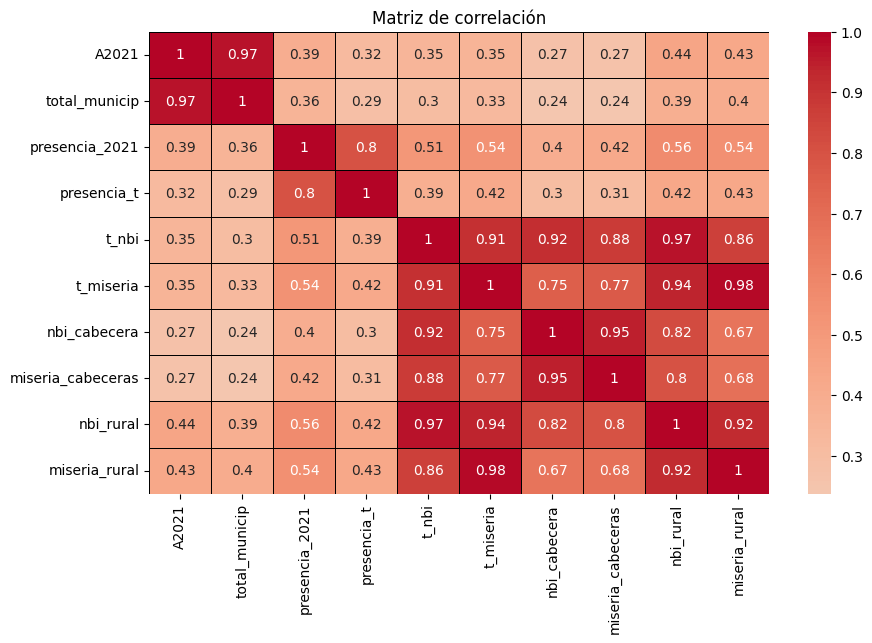

In [ ]:
# Realizar el gráfico de matriz de correlación

plt.rcParams["figure.figsize"] = (10, 6)
correlation_matrix = df5[['A2021', 'total_municip', 'presencia_2021', 'presencia_t', 't_nbi', 't_miseria', 'nbi_cabecera', 'miseria_cabeceras', 'nbi_rural', 'miseria_rural']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Matriz de correlación')
plt.show()

La matriz de correlación muestra que existe una correlación positiva moderada entre las variables analizadas de presencia de cultivos de coca ('presencia_2021' y 'presencia_t') y porcentaje de población con necesidades básicas insatisfechas ('t_nbi' y 't_miseria'). En particular, se observa que esta correlación es más fuerte en entornos rurales ('nbi_rural' y 'miseria_rural'), donde la población vive con necesidades básicas insatisfechas o bajo la línea de miseria. En contraste, con las cabeceras municipales ('nbi_cabecera' y 'miseria_cabeceras'), en donde esta correlación es más débil.

Esto significa que cuando aumenta la proporción de personas con necesidades básicas insatisfechas (principalmente en entornos rurales), por lo general tiende a aumentar la presencia de cultivos ilícitos, aunque esta relación es moderada y no perfecta, ya que hay muchos otros factores que pueden influir en ella.

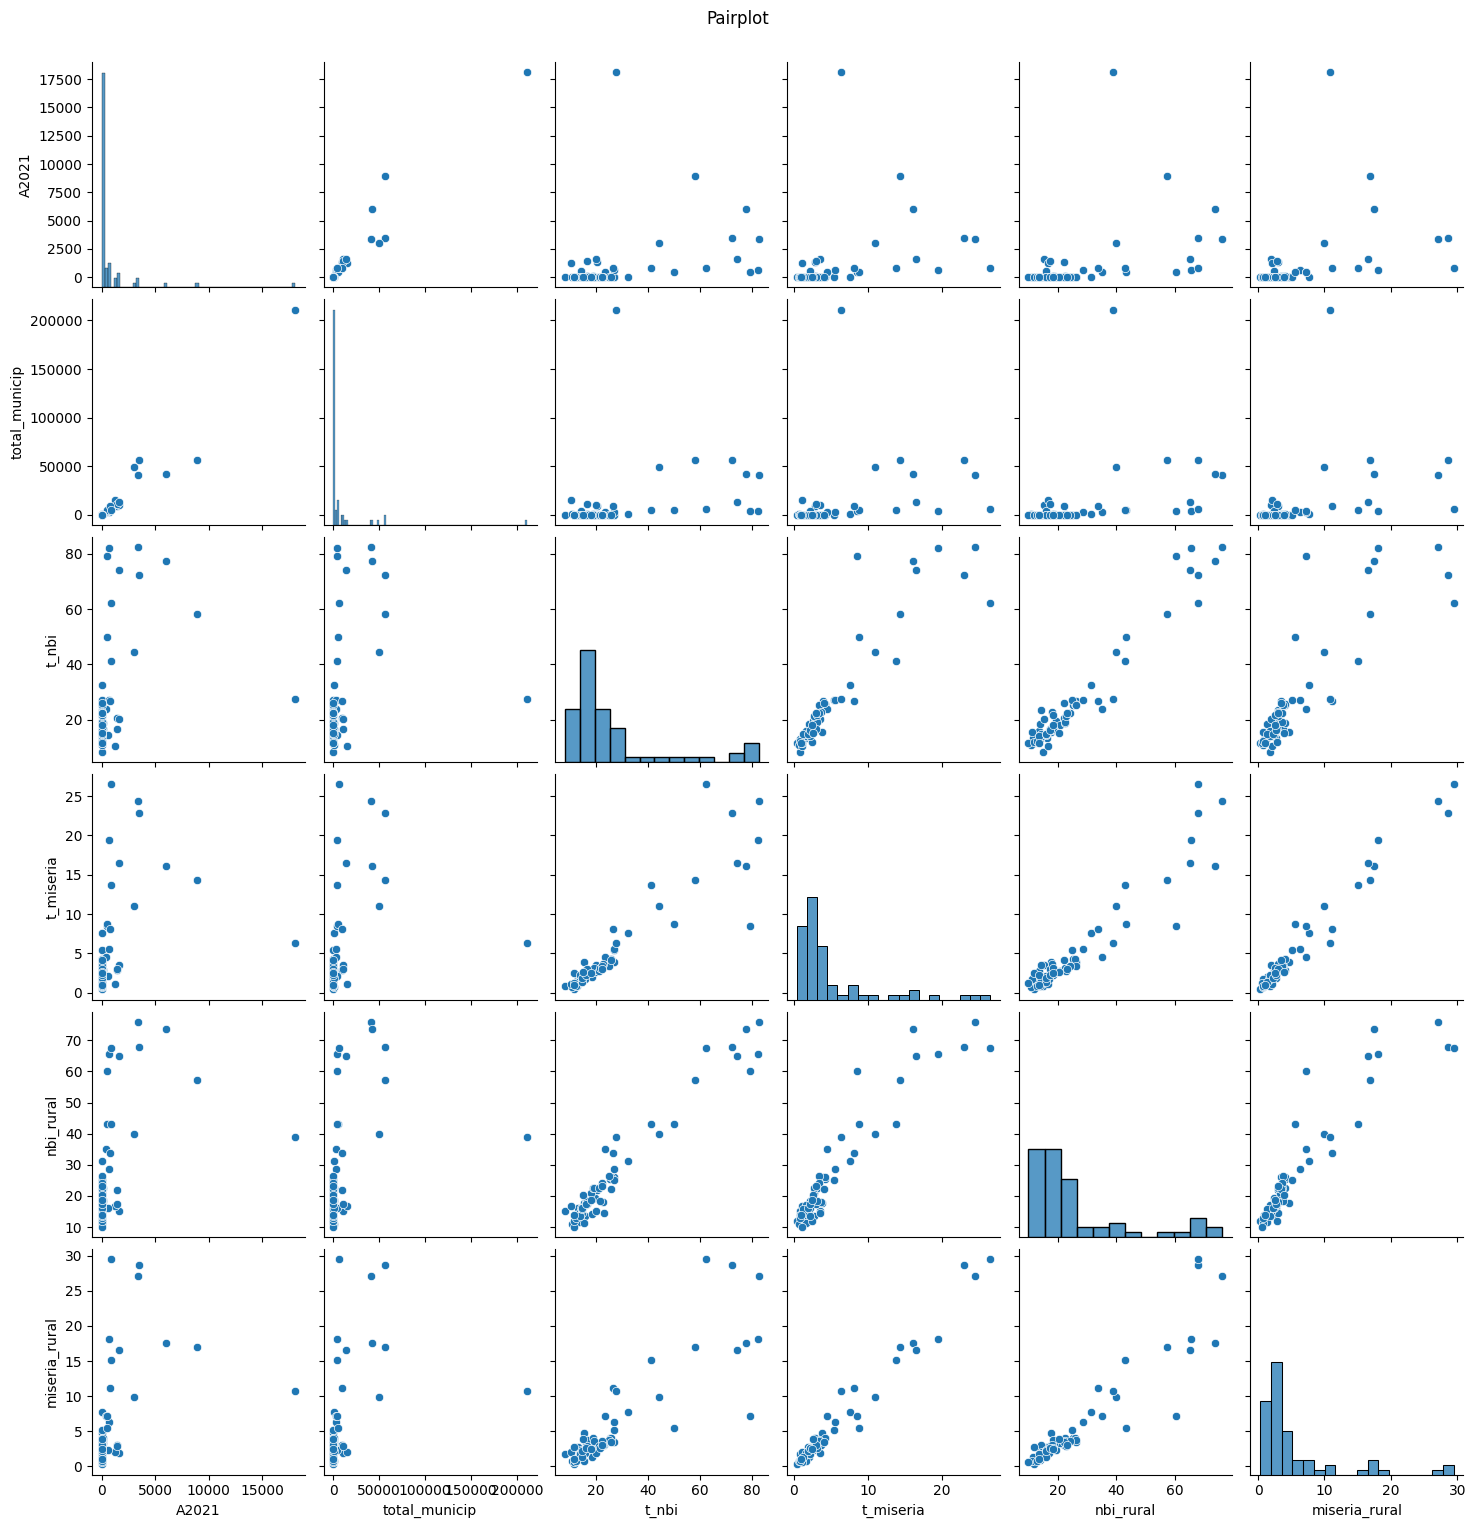

In [ ]:
# Crear gráficos de dispersión para las variables de interés
pairplot_data = df5[['A2021', 'total_municip', 't_nbi', 't_miseria', 'nbi_rural', 'miseria_rural']]
sns.pairplot(pairplot_data, kind="scatter")
plt.suptitle('Pairplot', y=1.02)
plt.show()

En los gráficos anteriores, se observa que los puntos están dispersos sin seguir una línea diagonal, lo que indica que no existe una relación lineal directa entre las variables analizadas. Es decir, los valores no están relacionados de forma predecible.

Dado que los gráficos de dispersión indican que no existe una correlación lineal evidente entre las variables analizadas, para analizar si existe una correlación no lineal entre ellas, se procede a calcular el coeficiente de correlación no lineal de Spearman.

In [ ]:
from scipy.stats import spearmanr

rho, p = spearmanr(df5['total_municip'], df5['t_nbi'])
print(rho)
print(p)

0.4294480003526173
0.0003983972479478326


El coeficiente de correlación de Spearman (0.429) indica una correlación positiva moderada entre las variables analizadas (total municipal de hectáreas con presencia de cultivos de coca en el período analizado y proporción de población con necesidades básicas insatisfechas). Es decir, hay una tendencia general a que los valores de una variable aumenten a medida que los valores de la otra variable también aumentan, aunque esta relación no es fuerte.

De acuerdo con los datos de significancia estadística obtenidos (0.000398), se sugiere que la correlación observada es altamente significativa. Esto significa que hay una muy baja probabilidad de que la correlación observada sea debida al azar, por lo que se puede considerar rechazar la hipótesis nula.



Con ayuda de la inteligencia artificial, se crea un código para calcular una matriz de correlaciones de Spearman que cruce todas las variables de interés, así como una matriz de sus valores de significancia estadística.

El prompt usado fue: "Como experto en Python, crea un código que calcule los coeficientes de correlación de Spearman para un conjunto de variables seleccionadas del dataframe "df5" y las ordene en una matriz".

In [ ]:
# Calcular la matriz de correlación de Spearman
selected_columns = ['A2021', 'total_municip', 'presencia_2021', 'presencia_t', 't_nbi', 't_miseria', 'nbi_cabecera', 'miseria_cabeceras', 'nbi_rural', 'miseria_rural']
corr_matrix, p_values = spearmanr(df5[selected_columns])

# Convertir la matriz de correlación a un DataFrame de pandas
corr_df = pd.DataFrame(corr_matrix, index=selected_columns, columns=selected_columns)

# Convertir la matriz de p-values a un DataFrame de pandas
p_values_df = pd.DataFrame(p_values, index=selected_columns, columns=selected_columns)

# Imprimir la matriz de correlación y la matriz de p-values
print("Matriz de correlación de Spearman:")
print(corr_df)

print("\nMatriz de p-values:")
print(p_values_df)

Matriz de correlación de Spearman:
                      A2021  total_municip  presencia_2021  presencia_t  \
A2021              1.000000       0.946330        0.952391     0.764218   
total_municip      0.946330       1.000000        0.903275     0.912719   
presencia_2021     0.952391       0.903275        1.000000     0.802421   
presencia_t        0.764218       0.912719        0.802421     1.000000   
t_nbi              0.505506       0.429448        0.415329     0.262721   
t_miseria          0.581406       0.514922        0.504390     0.357640   
nbi_cabecera       0.341932       0.293260        0.240634     0.157633   
miseria_cabeceras  0.407127       0.354731        0.302291     0.206787   
nbi_rural          0.561118       0.484779        0.482125     0.308486   
miseria_rural      0.587829       0.519974        0.533506     0.369505   

                      t_nbi  t_miseria  nbi_cabecera  miseria_cabeceras  \
A2021              0.505506   0.581406      0.341932           0

Para visualizar mejor los resultados, graficamos la matriz.

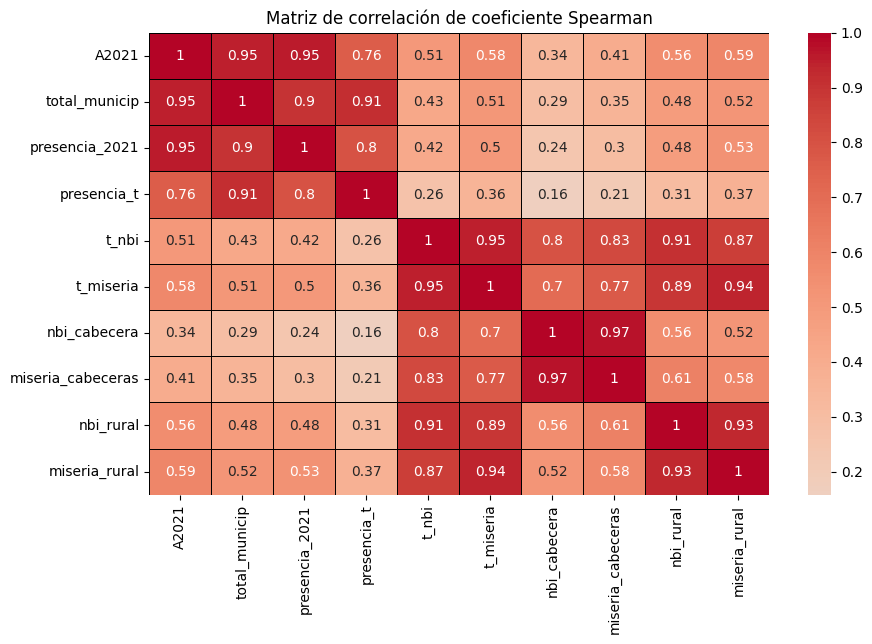

In [ ]:
# Gráfica
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Matriz de correlación de coeficiente Spearman')
plt.show()

La matriz confirma las observaciones previas, sugiriendo una correlación positiva moderada entre las variables analizadas: el total municipal de hectáreas con cultivos de coca (total_municip), la proporción de población con necesidades básicas insatisfechas (t_nbi) y la proporción de población en condiciones de pobreza extrema (t_miseria).

En otras palabras, se puede inferir que existe una tendencia general a que los valores de la variable "presencia de cultivos" aumenten cuando los valores de las variables "proporción de población con necesidades básicas insatisfechas" y "proporción de población en extrema pobreza" también aumentan. Aunque esta relación no es muy fuerte, se observa que es más pronunciada en el medio rural que en las cabeceras municipales.

5. **Análisis geoespacial de datos**

Para analizar si existe una correlación espacial entre las variables, con ayuda de la inteligencia artificial, se procede a realizar un análisis geoespacial de los datos mediante el cálculo del índice de Moran.

Nota: El índice de Moran es una medida de autocorrelación espacial que permite determinar si las variables presentan cierta agrupación espacial.

El prompt utilizado fue: "Como experto en Python, crea un código que calcule El índice de Moran para un conjunto de variables seleccionadas del dataframe "nariño3_geojson" y los represente en mapas".

Se crea un nuevo conjunto de datos para su análisis.

In [ ]:
# Verificar que el tipo de datos coincida para hacer join
df5['COD_MUNICIPIO'] = df5['COD_MUNICIPIO'].astype('int64')
depto['cod'] = depto['cod'].astype('int64')

In [ ]:
# Fusionar los datos con los datos del GeoJSON
nariño3_geojson = depto.merge(df5, left_on='cod', right_on='COD_MUNICIPIO', how='left')


In [ ]:
# Verificar
nariño3_geojson.head(3)

,OBJECTID_1,DPTO_CCDGO,MPIO_CCDGO,Shape_Leng,OBJECTID,MPIO_CNMBR,DESCRPCION,DEPTO,ShapeSTArea,ShapeSTLength,...,presencia_t,COD_dpto,Depto,Municipio,t_nbi,t_miseria,nbi_cabecera,miseria_cabeceras,nbi_rural,miseria_rural
0,113,52,683,0.485121,1066,SANDONA,AREA # 52683,NARIÑO,1.019917e+08,53609.049005,...,1.0,52,NARIÑO,SANDONÁ,14.657323,1.863354,13.235931,1.471861,16.025841,2.240283
1,114,52,685,0.470250,1067,SAN BERNARDO,AREA # 52685,NARIÑO,6.548551e+07,51880.267155,...,0.0,52,NARIÑO,SAN BERNARDO,21.241830,2.760874,17.541049,2.282739,22.690920,2.948095
2,115,52,687,0.781664,1068,SAN LORENZO,AREA # 52687,NARIÑO,2.502526e+08,85826.510855,...,0.0,52,NARIÑO,SAN LORENZO,21.682906,3.199808,46.889226,7.486090,18.281111,2.621339


In [ ]:
# Revisar columnas del dataset
print(f"El dataset contiene {nariño3_geojson.shape[0]} filas y {nariño3_geojson.shape[1]} columnas")
print(f" Las columnas son: {list(nariño3_geojson.keys())}")

El dataset contiene 64 filas y 26 columnas
 Las columnas son: ['OBJECTID_1', 'DPTO_CCDGO', 'MPIO_CCDGO', 'Shape_Leng', 'OBJECTID', 'MPIO_CNMBR', 'DESCRPCION', 'DEPTO', 'ShapeSTArea', 'ShapeSTLength', 'geometry', 'cod', 'COD_MUNICIPIO', 'total_municip', 'A2021', 'presencia_2021', 'presencia_t', 'COD_dpto', 'Depto', 'Municipio', 't_nbi', 't_miseria', 'nbi_cabecera', 'miseria_cabeceras', 'nbi_rural', 'miseria_rural']


El dataset contiene información sobre los 64 municipios organizada en 26 columnas.

In [ ]:
# Ver valores nulos
nariño3_geojson.isnull().sum()

OBJECTID_1           0
DPTO_CCDGO           0
MPIO_CCDGO           0
Shape_Leng           0
OBJECTID             0
MPIO_CNMBR           0
DESCRPCION           0
DEPTO                0
ShapeSTArea          0
ShapeSTLength        0
geometry             0
cod                  0
COD_MUNICIPIO        0
total_municip        0
A2021                0
presencia_2021       0
presencia_t          0
COD_dpto             0
Depto                0
Municipio            0
t_nbi                0
t_miseria            0
nbi_cabecera         0
miseria_cabeceras    0
nbi_rural            0
miseria_rural        0
dtype: int64

El dataset creado no tiene valores nulos

In [ ]:
# Seleccionar las columnas de interés
presencia_coca_2021 = nariño3_geojson["presencia_2021"]
presencia_coca_total = nariño3_geojson["presencia_t"]
nbi = nariño3_geojson["t_nbi"]

In [ ]:
# Convertir las columnas en una serie de pandas
presencia_coca_2021 = pd.Series(presencia_coca_2021)
presencia_coca_total = pd.Series(presencia_coca_total)
nbi_series = pd.Series(nbi)

In [ ]:
# Crear matriz de pesos espaciales
w = lp.Queen.from_dataframe(nariño3_geojson)

<ipython-input-78-140c428fd97a>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lp.Queen.from_dataframe(nariño3_geojson)


In [ ]:
# Calcular índice de Moran local para la presencia de coca en el año 2021
moran_loc1 = esda.Moran_Local(presencia_coca_2021, w)
print(moran_loc1)

# Calcular índice de Moran local para la presencia de coca en la totalidad del periodo de análisis
moran_loc2 = esda.Moran_Local(presencia_coca_total, w)
print(moran_loc2)

# Calcular índice de Moran local para las NBI
moran_loc3 = esda.Moran_Local(nbi_series, w)
print(moran_loc3)

In [ ]:
# Pasar las series de pandas a la función Moran_Local
ml_presencia_coca_2021 = esda.Moran_Local(presencia_coca_2021, w)
ml_presencia_coca_total = esda.Moran_Local(presencia_coca_total, w)
ml_nbi = esda.Moran_Local(nbi, w)

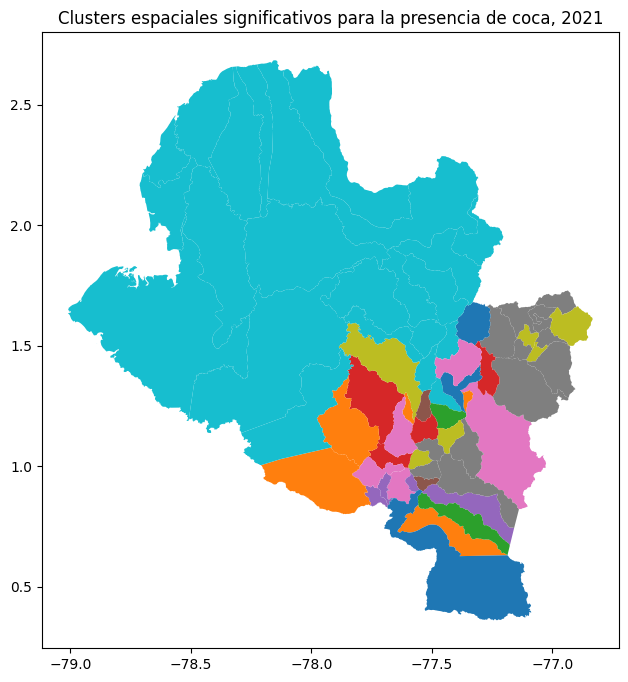

In [ ]:
# Crear mapa de clusters espaciales significativos para la presencia de coca en 2021
fig, ax = plt.subplots(figsize=(8, 8))
nariño3_geojson.assign(cl=ml_presencia_coca_2021.Is) \
   .plot(column="cl", categorical=True, legend=False, linewidth=0.1, ax=ax)
plt.title("Clusters espaciales significativos para la presencia de coca, 2021")
plt.show()

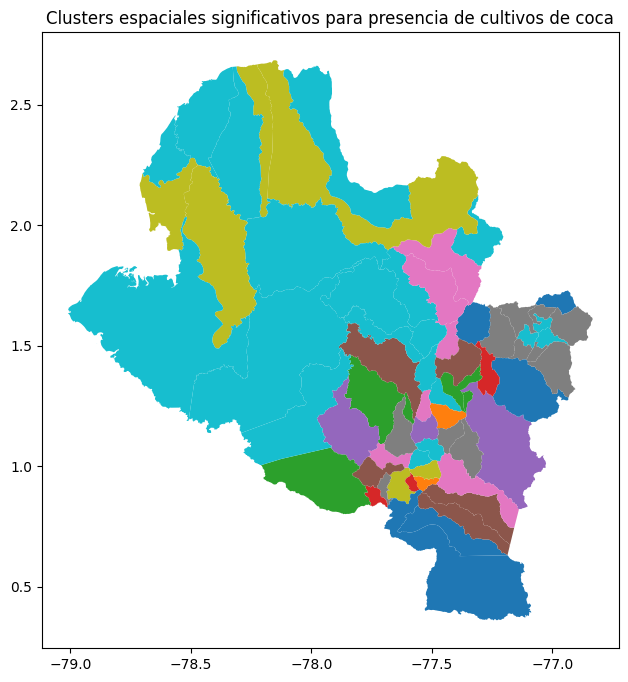

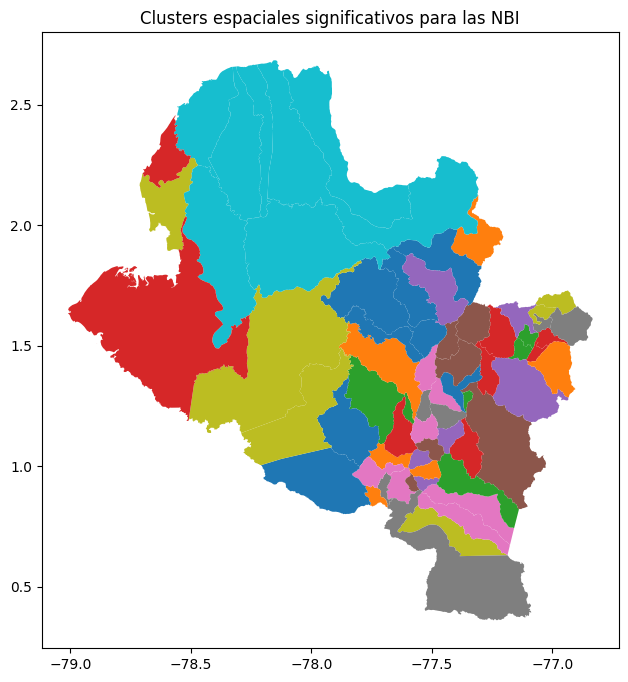

In [ ]:
# Crear mapa de clusters espaciales significativos para la presencia de coca en la totalidad del periodo de análisis
fig, ax = plt.subplots(figsize=(8, 8))
nariño3_geojson.assign(cl=ml_presencia_coca_total.Is) \
   .plot(column="cl", categorical=True, legend=False, linewidth=0.1, ax=ax)
plt.title("Clusters espaciales significativos para presencia de cultivos de coca")
plt.show()

# Crear mapa de clusters espaciales significativos para las NBI
fig, ax = plt.subplots(figsize=(8, 8))
nariño3_geojson.assign(cl=ml_nbi.Is) \
   .plot(column="cl", categorical=True, legend=False, linewidth=0.1, ax=ax)
plt.title("Clusters espaciales significativos para las NBI")
plt.show()


Los mapas representan mediante diferentes colores grupos de municipios con características similares. Se observa la presencia de varios clusters significativos de municipios, lo que sugiere la existencia de algunos patrones espaciales en la distribución tanto de los cultivos de coca como de la proporción de personas con necesidades básicas insatisfechas. Es decir, algunos municipios colindantes presentan características similares.

Al observar la distribución de los clusters en un año específico (por ejemplo, en el primer mapa de 2021), se nota que, al superponer los mapas, se puede inferir cierta correlación espacial entre los clusters significativos de presencia de coca (representados en azul turquesa) y los clusters de personas con necesidades básicas insatisfechas (representados en azul turquesa y verde), principalmente en los municipios ubicados en las regiones de Sanquianga y Telembí.

6. **Análisis de variables categóricas**

Por último, se realiza un análisis de correlación entre las variables categóricas del ejercicio: presencia, o no, de cultivos ilícitos en los municipios del departamento. Esta variable será analizada en relación con la proporción de personas con necesidades básicas insatisfechas.

In [ ]:
# Descripción de las variables de NBI
descrip_nbi = df5['t_nbi'].describe()
print(descrip_nbi)

count    64.000000
mean     26.473923
std      19.731892
min       8.244979
25%      14.653833
50%      19.041004
75%      26.707776
max      82.508902
Name: t_nbi, dtype: float64


In [ ]:
# Calcular los percentiles
percentiles = df5['t_nbi'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
print("Percentiles:", percentiles)

Percentiles: {0.2: 14.062862143236352, 0.4: 16.651266720138576, 0.6: 22.2322351155928, 0.8: 27.34576388789147}


Para categorizar la variable correspondiente a la proporción de población con necesidades básicas insatisfechas en cada municipio, se utilizarán los percentiles 20, 40, 60 y 80, así como los valores mínimo y máximo de la variable.

In [ ]:
# Definir los límites de las categorías
bins = [df5['t_nbi'].min(), percentiles[0.2], percentiles[0.4], percentiles[0.6], percentiles[0.8], df5['t_nbi'].max()]
labels = ['Muy baja', 'Baja', 'Media', 'Alta', 'Muy alta']

In [ ]:
# Crear una nueva columna
df5['nbi_categorica'] = pd.cut(df5['t_nbi'], bins=bins, labels=labels, include_lowest=True)

# Ver las nuevas categorías
print(df5.head())

   COD_MUNICIPIO  total_municip  A2021  presencia_2021  presencia_t  COD_dpto  \
0          52001           0.00   0.00             0.0          0.0        52   
1          52019           0.00   0.00             0.0          0.0        52   
2          52022           0.00   0.00             0.0          0.0        52   
3          52036         328.48  56.07             1.0          1.0        52   
4          52051           0.00   0.00             0.0          0.0        52   

    Depto Municipio      t_nbi  t_miseria  nbi_cabecera  miseria_cabeceras  \
0  NARIÑO     PASTO   8.244979   0.881632      6.257996           0.633026   
1  NARIÑO     ALBÁN  15.895495   2.771334     21.856028           3.642671   
2  NARIÑO    ALDANA  11.685099   0.407451     10.349374           0.791035   
3  NARIÑO    ANCUYÁ  10.800695   0.695094     10.653266           0.653266   
4  NARIÑO  ARBOLEDA  25.308156   4.261736     25.304348           5.130435   

   nbi_rural  miseria_rural nbi_categorica  

In [ ]:
# Ver la distribución de las categorías
print(df5['nbi_categorica'].value_counts())

nbi_categorica
Muy baja    13
Baja        13
Alta        13
Muy alta    13
Media       12
Name: count, dtype: int64


La distribución de la variable categórica muestra que hay 13 municipios catalogados con una proporción 'Muy baja' de personas con necesidades básicas insatisfechas, así como 13 municipios clasificados como 'Baja', 'Alta' y 'Muy alta'. Además, se observa que 12 municipios tienen una proporción clasificada como 'Media'.

6.1 **Prueba de chi-cuadrado**

La prueba chi-cuadrado es una herramienta estadística utilizada para determinar si existe una asociación significativa entre dos variables categóricas.

In [ ]:
# Crear una tabla de contingencia para el año 2021
tabla_contingencia1 = pd.crosstab(df5['presencia_2021'], df5['nbi_categorica'])
print(tabla_contingencia1)

nbi_categorica  Muy baja  Baja  Media  Alta  Muy alta
presencia_2021                                       
0.0                   10     9      8    10         0
1.0                    3     4      4     3        13


La tabla de contingencia muestra que, en el año 2021, la mayoría de los municipios sin cultivos de coca están clasificados entre los municipios donde el porcentaje de población con necesidades básicas insatisfechas es "muy bajo" o "bajo". Mientras tanto, ninguno de los municipios donde el porcentaje de población con necesidades básicas insatisfechas es "muy alto" no tiene cultivos de coca. De hecho, la mayoría de los municipios con presencia de cultivos de coca están clasificados con un porcentaje muy alto de población con NBI. Esto sugiere que existe una relación significativa entre la presencia de cultivos de coca en este año y el porcentaje de población con NBI.

In [ ]:
from scipy.stats import chi2_contingency

# Realizar la prueba de chi-cuadrado
chi2, p_valor, grados_libertad, _ = chi2_contingency(tabla_contingencia1)

In [ ]:
# Ver los resultados
print("\nResultados de la prueba de chi-cuadrado:")
print("Estadístico de chi-cuadrado:", chi2)
print("Valor p:", p_valor)
print("Grados de libertad:", grados_libertad)


Resultados de la prueba de chi-cuadrado:
Estadístico de chi-cuadrado: 22.78873745540412
Valor p: 0.00013954457229123506
Grados de libertad: 4


El valor de P (0.00014) nos indica que hay suficiente evidencia para rechazar la hipótesis nula de independencia entre las variables de presencia de cultivos de coca y las categorías de NBI. Es decir, en 2021, en los municipios analizados, existe una correlación significativa entre las variables analizadas.


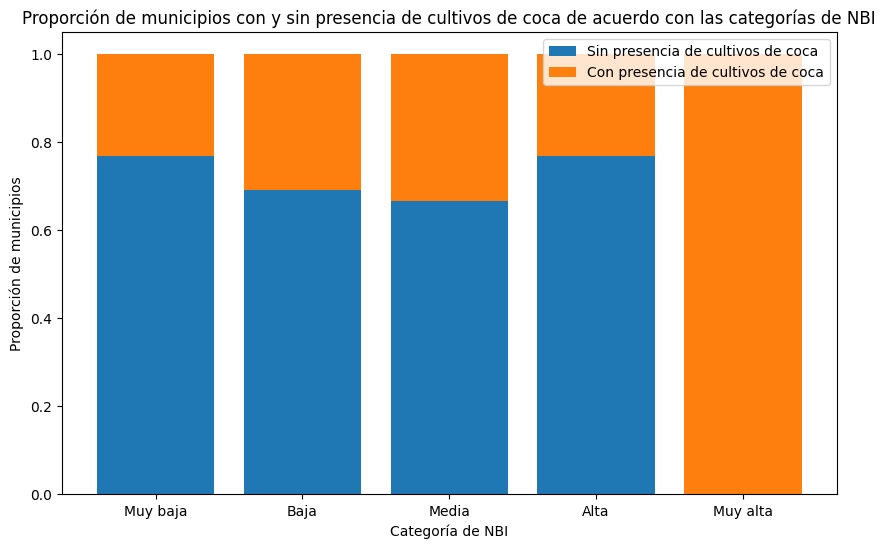

In [ ]:
# Calcular las proporciones
tabla_contingencia1 = pd.crosstab(df5['presencia_2021'], df5['nbi_categorica'], normalize='columns')

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
barra1 = ax.bar(tabla_contingencia1.columns, tabla_contingencia1.loc[0], label='Sin presencia de cultivos de coca')
barra2 = ax.bar(tabla_contingencia1.columns, tabla_contingencia1.loc[1], bottom=tabla_contingencia1.loc[0], label='Con presencia de cultivos de coca')
ax.set_xlabel('Categoría de NBI')
ax.set_ylabel('Proporción de municipios')
ax.set_title('Proporción de municipios con y sin presencia de cultivos de coca de acuerdo con las categorías de NBI')
ax.legend()
plt.show()

El gráfico permite visualizar con mayor claridad la relación entre los municipios categorizados según la proporción de personas con necesidades básicas insatisfechas y la presencia de cultivos de coca en 2021.

In [ ]:
# Crear una tabla de contingencia para la totalidad del periodo
tabla_contingencia2 = pd.crosstab(df5['presencia_t'], df5['nbi_categorica'])
print(tabla_contingencia2)

nbi_categorica  Muy baja  Baja  Media  Alta  Muy alta
presencia_t                                          
0.0                    7     8      5    10         0
1.0                    6     5      7     3        13


En relación con la presencia de cultivos de coca durante el período analizado (2000-2022), la tabla de contingencia muestra una relación menos evidente. Según los datos, se observa una tendencia donde 6 municipios (46%) con una proporción "Muy baja" de personas con NBI y 5 municipios (38%) con "Baja" proporción tienen presencia de cultivos de coca. Por otro lado, 10 municipios (76%) con una proporción "Alta" de personas con NBI no presentan cultivos de coca. Sin embargo, persiste la relación entre los municipios con "Muy alta" proporción de personas con NBI, dado que todos los municipios donde este porcentaje es "Muy alto" tienen cultivos de coca.

Estas variaciones en los datos pueden indicar la necesidad de subdividir el período de análisis en segmentos más pequeños. Esto permitiría evidenciar mejor las fluctuaciones en el comportamiento de los datos, así como visualizar las transformaciones en las variables y determinar la permanencia o no de los cultivos en ciertos municipios a lo largo del tiempo. Subdividir el período de análisis podría facilitar la identificación de patrones temporales más precisos y comprender mejor la dinámica de la relación entre la presencia de cultivos de coca y la proporción de personas con NBI en diferentes momentos.

In [ ]:
# Realizar la prueba de chi-cuadrado para la totalidad del periodo
chi2, p_valor, grados_libertad, _ = chi2_contingency(tabla_contingencia2)

# Ver los resultados
print("\nResultados de la prueba de chi-cuadrado:")
print("Estadístico de chi-cuadrado:", chi2)
print("Valor p:", p_valor)
print("Grados de libertad:", grados_libertad)


Resultados de la prueba de chi-cuadrado:
Estadístico de chi-cuadrado: 17.69089994972348
Valor p: 0.0014180954246635763
Grados de libertad: 4


Los resultados de la prueba de chi-cuadrado revelan una asociación significativa entre las variables categóricas analizadas. Es decir, la presencia de cultivos de coca está estrechamente relacionada con la proporción de personas con NBI en los municipios examinados.

El valor de p obtenido (0.0014) indica que se puede rechazar la hipótesis nula de ausencia de asociación entre las variables.

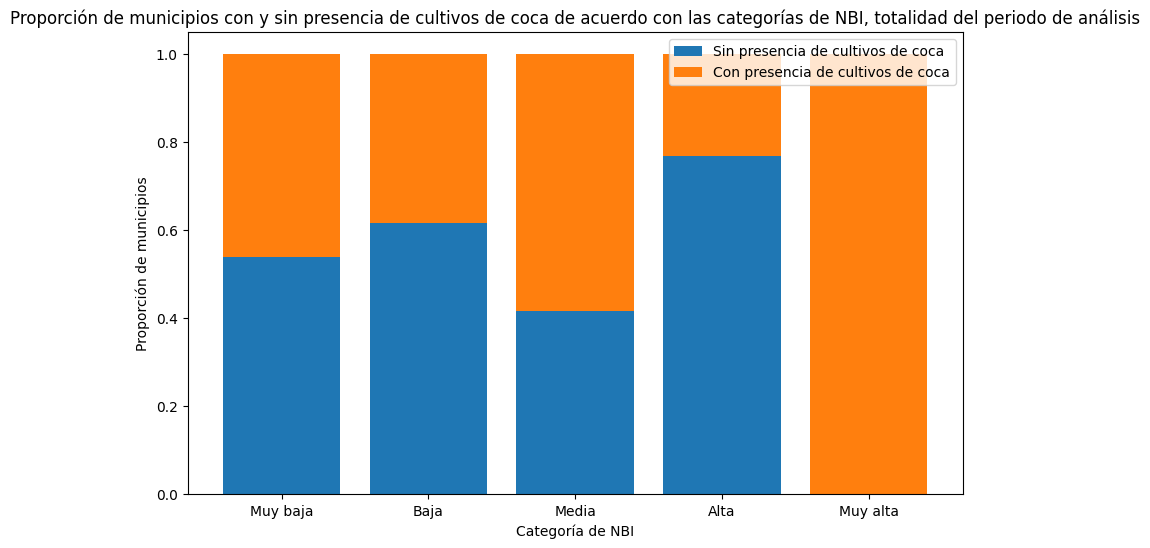

In [ ]:
# Calcular las proporciones
tabla_contingencia1 = pd.crosstab(df5['presencia_t'], df5['nbi_categorica'], normalize='columns')

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
barra1 = ax.bar(tabla_contingencia1.columns, tabla_contingencia1.loc[0], label='Sin presencia de cultivos de coca')
barra2 = ax.bar(tabla_contingencia1.columns, tabla_contingencia1.loc[1], bottom=tabla_contingencia1.loc[0], label='Con presencia de cultivos de coca')
ax.set_xlabel('Categoría de NBI')
ax.set_ylabel('Proporción de municipios')
ax.set_title('Proporción de municipios con y sin presencia de cultivos de coca de acuerdo con las categorías de NBI, totalidad del periodo de análisis')
ax.legend()
plt.show()

7. **Pruebas de regresión lineal**

Como ejercicio adicional, a continuación se presentan algunas de las pruebas de regresión lineal desarrolladas en el bootcamp aplicadas al caso de estudio.

7.1 **Regresión lineal**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Regresión lineal
# x = variable independiente => Porcentaje de población con NBI
# y = variable dependiente => Presencia de cultivos de coca

X = df5[['t_nbi']]
y = df5['A2021']

# Particionar en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(48, 1)


In [ ]:
# Crear el modelo
regressor = LinearRegression(fit_intercept = True)

# Entrenar el modelo con los datos
regressor.fit(X_train, y_train)

print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")

La pendiente del modelo (B) es: [55.93000253], el intersecto (A) es -390.31828520374665


Text(0.5, 1.0, 'Prueba de regresión lineal')

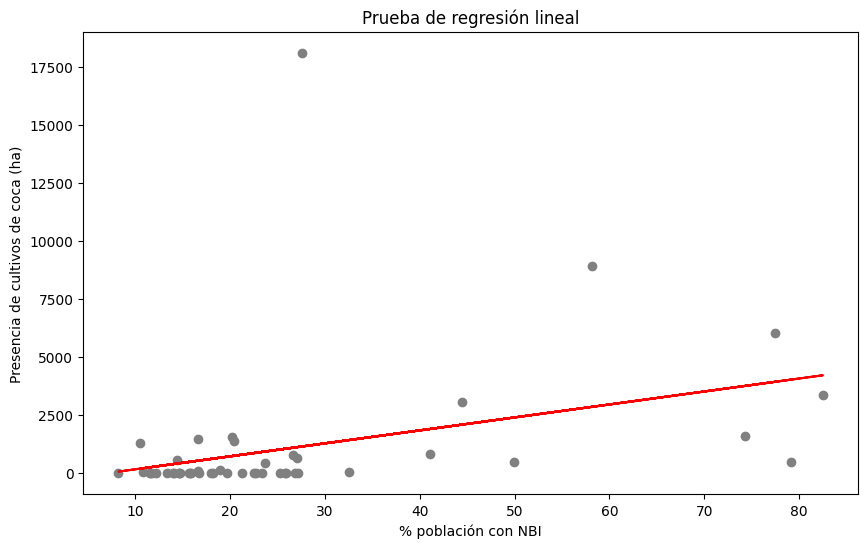

In [ ]:
# Graficar
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Presencia de cultivos de coca (ha)')
plt.xlabel('% población con NBI')
plt.title('Prueba de regresión lineal')

7.2 **Test de entrenamiento del modelo de regresión**

Text(0.5, 1.0, 'Resultados del test')

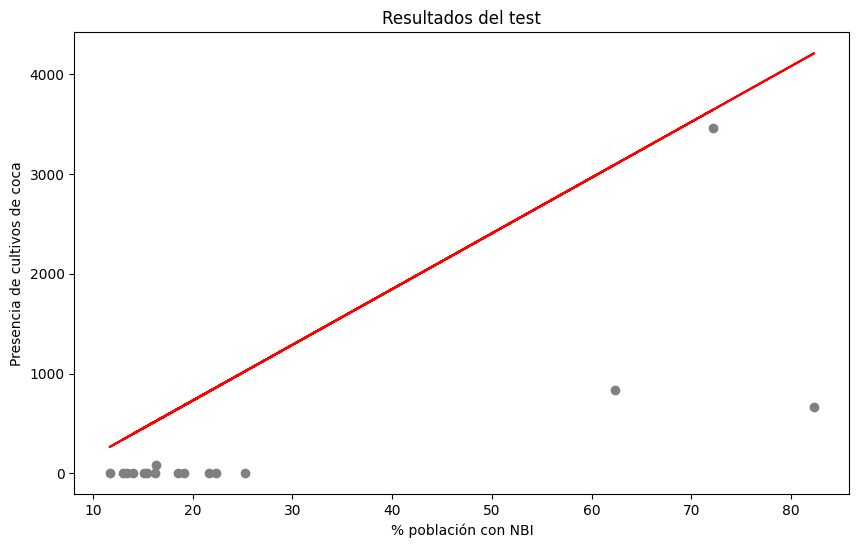

In [ ]:
# Resultados del test
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Presencia de cultivos de coca')
plt.xlabel('% población con NBI')
plt.title('Resultados del test')

7.3 **Errores medios cuadrático y absoluto**

In [ ]:
# Evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 1402985.2629142401
Root Mean Squared Error: 1184.4767886768573


In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 829.2269904510848


7.4 **R cuadrado**

In [ ]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: -0.9432401613552646


Como se observó anteriormente al analizar los gráficos de dispersión, no existe una correlación lineal directa entre las variables analizadas, lo que sugiere que el modelo de regresión lineal puede tener dificultades para predecir cómo se relacionarán los valores. Los datos resultantes de los cálculos anteriores ratifican que el modelo tiene un ajuste moderado, dado que el coeficiente de determinación (R-cuadrado) es relativamente bajo y los errores (MSE, RMSE, MAE) son significativos. Estos resultados subrayan precisamente la complejidad de la relación entre las variables estudiadas.

**Síntesis y conclusiones**

El ejercicio realizado tenía como objetivo analizar la evolución de la presencia de cultivos de coca en el departamento de Nariño desde el año 2000 hasta el 2022 y su relación con la población con necesidades básicas insatisfechas (NBI), a través de un análisis estadístico descriptivo e inferencial, utilizando datos oficiales y herramientas de análisis geoespacial. Se presentan a continuación algunos de los principales resultados obtenidos.

En cuanto al primer objetivo específico, que corresponde a describir la evolución de los cultivos de coca, los datos revelaron una tendencia creciente en su presencia en el departamento durante el período analizado. Si bien se observaron fluctuaciones y una ligera disminución en algunos años, particularmente en 2018 y 2020, la tendencia general fue al incremento, alcanzando su punto máximo hacia el final del período, entre 2021 y 2022. Asimismo, se evidenció una alta concentración de los cultivos en ciertos municipios, siendo Tumaco, Barbacoas, El Charco, Roberto Payán y Olaya Herrera los que registraron el mayor número de hectáreas.

Respecto al segundo objetivo, que consistió en mapear la distribución geográfica de los cultivos, los análisis espaciales mostraron que los municipios con mayor presencia se encuentran en las subregiones del Pacífico, Sanquianga y Telembí. Esta distribución geográfica se mantuvo constante durante el período analizado. Los análisis de correlación espacial revelaron patrones de agrupación geográfica significativos, donde algunos municipios colindantes presentaron características similares en cuanto a la presencia de cultivos de coca y la proporción de población con NBI.

En relación con el tercer objetivo, que consistió en analizar la correlación entre la presencia de cultivos de coca y las NBI, los resultados indicaron una correlación positiva moderada. En general, a mayor proporción de población con necesidades básicas insatisfechas, mayor presencia de cultivos ilícitos, aunque esta relación no es perfecta ni lineal. La correlación fue más fuerte en las zonas rurales que en las cabeceras municipales. Adicionalmente, las pruebas de independencia entre las variables categóricas mostraron una asociación significativa entre la presencia de cultivos de coca y las categorías de NBI, tanto en 2021 como en el período completo analizado, lo cual refuerza la evidencia de una relación entre ambas variables.

En síntesis, con base en los hallazgos obtenidos, se puede inferir que, si bien no existe una correlación lineal directa entre la presencia de cultivos de coca y las necesidades básicas insatisfechas, sí se observa una tendencia general a que los municipios con mayores niveles de NBI presenten una mayor presencia de estos cultivos ilícitos. Esta relación se concentra principalmente en las subregiones del Pacífico, Sanquianga y Telembí, y es más evidente en las zonas rurales que en las cabeceras municipales. Es importante tener en cuenta que la relación entre los fenómenos estudiados es compleja y multifactorial, por lo que se requieren ejercicios adicionales que profundicen en el análisis de otras variables relevantes como el conflicto armado, la presencia diferenciada del Estado, las alternativas económicas lícitas, los programas de sustitución de cultivos, entre otros factores relevantes.

Además, como se menciona en el documento, subdividir el período de análisis en segmentos más pequeños podría revelar patrones temporales más precisos y ayudar a identificar fluctuaciones o cambios en la relación entre las variables a lo largo del tiempo. Igualmente, ejercicios similares que profundicen en los análisis geoespaciales a través de la exploración de otras técnicas podrían contribuir a una comprensión más detallada de la distribución espacial y los factores geográficos que influyen en la relación entre las variables.

**Referencias**

Departamento Administrativo Nacional de Estadística (DANE). Censo Nacional de Población y Vivienda (CNPV). [dataset]. https://dane.maps.arcgis.com/apps/MapSeries/index.html?appid=dc3699bda82348859801cf3414516fec

Herramientas de inteligencia artificial utilizadas: Chat GPT (https://chatgpt.com/), Claude (https://claude.ai) y Copilot (https://copilot.microsoft.com/)

Ministerio de Justicia de Colombia. Observatorio de Drogas. [dataset].  https://www.minjusticia.gov.co/programas-co/ODC/Paginas/SIDCO.aspx

Ministerio de Tecnologías de la Información y las Comunicaciones (MinTIC). Talento Tech. Bootcamp: Análisis de datos. https://talentotech.gov.co/portal/
